# Check TVC validation files

Downloaded from https://github.com/V-Dutch/TVCSnowCLM the 13/11/2024 by Mickaël Lalande

- Article (Dutch et al., 2022) : https://tc.copernicus.org/articles/16/4201/2022/
- Soil data: https://doi.pangaea.de/10.1594/PANGAEA.962726 (14/11/2024 by Mickaël Lalande)

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData'

### TVC_CLASSIC_2013_2020

In [3]:
df_units = pd.read_csv(path+'/TVC_CLASSIC_2013_2020.csv', encoding='latin1', header=[0, 1])
df_units

,TIMESTAMP,SWin,SWout,LWin,LWout,albedo,AirT,RH,AirP,WindSpeed_10m,...,SoilHEatFlux_org,SoilHEatFlux_min,NEE_filt,LE_filt,H_filt,NEE_filled,LE_filled,H_filled,CH4_filt,CH4_filled
,yyyy-mm-dd HH:MM,W m-2,W m-2,W m-2,W m-2,Unnamed: 5_level_1,deg C,%,kPa,m s-2,...,W m-2,W m-2,µmol CO2 m-2 s-1,W m-2,W m-2,µmol CO2 m-2 s-1,W m-2,W m-2,µmol CH4 m-2 s-1,µmol CH4 m-2 s-1
0,2013-01-01 00:00,0.000,0.000,237.973,238.290,0.755,-18.800,85.0,100.630,4.167,...,-8.99,-5.569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 00:30,0.000,0.014,237.689,237.880,NaN,-19.070,85.0,100.683,4.167,...,-8.99,-5.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 01:00,0.000,0.000,236.700,237.206,NaN,-19.200,85.0,100.710,4.167,...,-8.99,-5.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 01:30,0.000,0.000,234.676,235.833,0.643,-19.363,84.5,100.744,3.611,...,-8.98,-5.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 02:00,0.000,0.000,234.681,235.505,0.049,-19.500,84.0,100.780,3.056,...,-8.96,-5.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123602,2020-01-20 01:00,3.577,3.540,230.182,232.720,0.993,-26.500,73.0,99.320,3.611,...,NaN,NaN,0.270426,0.409666,-2.25740,0.270426,0.409666,-2.25740,NaN,NaN
123603,2020-01-20 01:30,1.254,1.460,230.077,232.651,NaN,-26.313,72.0,99.337,4.167,...,NaN,NaN,0.325818,0.637850,-1.92702,0.325818,0.637850,-1.92702,NaN,NaN
123604,2020-01-20 02:00,0.000,0.316,229.337,232.360,NaN,-26.200,71.0,99.350,4.722,...,NaN,NaN,0.050000,0.231356,-2.27360,0.050000,0.231356,-2.27360,NaN,NaN


In [4]:
units = df_units.columns.get_level_values(1)
units

Index(['yyyy-mm-dd HH:MM', 'W m-2', 'W m-2', 'W m-2', 'W m-2',
       'Unnamed: 5_level_1', 'deg C', '%', 'kPa', 'm s-2', 'm s-2',
       'kg m-2 day-1', 'm', 'deg C', 'm 3 m-3', 'deg C', 'deg C', 'deg C',
       'deg C', 'm 3 m-3', 'm 3 m-3', 'm 3 m-3', 'm 3 m-3', 'W m-2', 'W m-2',
       'µmol CO2 m-2 s-1', 'W m-2', 'W m-2', 'µmol CO2 m-2 s-1', 'W m-2',
       'W m-2', 'µmol CH4 m-2 s-1', 'µmol CH4 m-2 s-1'],
      dtype='object')

In [5]:
# df = pd.read_csv(path+'/TVC_CLASSIC_2013_2020.csv', sep=';', parse_dates=['Date'], index_col=['Date'])
df_TVC_CLASSIC_2013_2020 = pd.read_csv(path+'/TVC_CLASSIC_2013_2020.csv', parse_dates=['TIMESTAMP'], index_col=['TIMESTAMP'], encoding='latin1', skiprows=[1])
df_TVC_CLASSIC_2013_2020

,SWin,SWout,LWin,LWout,albedo,AirT,RH,AirP,WindSpeed_10m,ustar,...,SoilHEatFlux_org,SoilHEatFlux_min,NEE_filt,LE_filt,H_filt,NEE_filled,LE_filled,H_filled,CH4_filt,CH4_filled
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.000,0.000,237.973,238.290,0.755,-18.800,85.0,100.630,4.167,0.323,...,-8.99,-5.569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 00:30:00,0.000,0.014,237.689,237.880,NaN,-19.070,85.0,100.683,4.167,0.266,...,-8.99,-5.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 01:00:00,0.000,0.000,236.700,237.206,NaN,-19.200,85.0,100.710,4.167,0.323,...,-8.99,-5.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 01:30:00,0.000,0.000,234.676,235.833,0.643,-19.363,84.5,100.744,3.611,0.301,...,-8.98,-5.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 02:00:00,0.000,0.000,234.681,235.505,0.049,-19.500,84.0,100.780,3.056,0.274,...,-8.96,-5.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 01:00:00,3.577,3.540,230.182,232.720,0.993,-26.500,73.0,99.320,3.611,0.554,...,NaN,NaN,0.270426,0.409666,-2.25740,0.270426,0.409666,-2.25740,NaN,NaN
2020-01-20 01:30:00,1.254,1.460,230.077,232.651,NaN,-26.313,72.0,99.337,4.167,0.604,...,NaN,NaN,0.325818,0.637850,-1.92702,0.325818,0.637850,-1.92702,NaN,NaN
2020-01-20 02:00:00,0.000,0.316,229.337,232.360,NaN,-26.200,71.0,99.350,4.722,0.619,...,NaN,NaN,0.050000,0.231356,-2.27360,0.050000,0.231356,-2.27360,NaN,NaN


In [6]:
ds_TVC_CLASSIC_2013_2020 = df_TVC_CLASSIC_2013_2020.to_xarray()
ds_TVC_CLASSIC_2013_2020

<xarray.Dataset> Size: 33MB
Dimensions:            (TIMESTAMP: 123607)
Coordinates:
  * TIMESTAMP          (TIMESTAMP) datetime64[ns] 989kB 2013-01-01 ... 2020-0...
Data variables: (12/32)
    SWin               (TIMESTAMP) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (TIMESTAMP) float64 989kB 0.0 0.014 0.0 ... 0.084 0.057
    LWin               (TIMESTAMP) float64 989kB 238.0 237.7 ... 228.9 227.0
    LWout              (TIMESTAMP) float64 989kB 238.3 237.9 ... 232.3 231.9
    albedo             (TIMESTAMP) float64 989kB 0.755 nan nan ... nan nan nan
    AirT               (TIMESTAMP) float64 989kB -18.8 -19.07 ... -26.65 -27.1
    ...                 ...
    H_filt             (TIMESTAMP) float64 989kB nan nan nan ... -2.865 -4.064
    NEE_filled         (TIMESTAMP) float64 989kB nan nan nan ... 0.4015 0.3455
    LE_filled          (TIMESTAMP) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (TIMESTAMP) float64 989kB nan nan nan ... -2.865 -4.064
    CH4_filt           (TIMESTAMP) float64 989kB nan nan nan nan ... nan nan nan
    CH4_filled         (TIMESTAMP) float64 989kB nan nan nan nan ... nan nan nan

In [27]:
units[1:]

Index(['W m-2', 'W m-2', 'W m-2', 'W m-2', 'Unnamed: 5_level_1', 'deg C', '%',
       'kPa', 'm s-2', 'm s-2', 'kg m-2 day-1', 'm', 'deg C', 'm 3 m-3',
       'deg C', 'deg C', 'deg C', 'deg C', 'm 3 m-3', 'm 3 m-3', 'm 3 m-3',
       'm 3 m-3', 'W m-2', 'W m-2', 'µmol CO2 m-2 s-1', 'W m-2', 'W m-2',
       'µmol CO2 m-2 s-1', 'W m-2', 'W m-2', 'µmol CH4 m-2 s-1',
       'µmol CH4 m-2 s-1'],
      dtype='object')

In [7]:
# Assign units as an attribute to each variable in the xarray Dataset
for i, var in enumerate(ds_TVC_CLASSIC_2013_2020.data_vars):
    print(var)
    print(units[1:][i])
    ds_TVC_CLASSIC_2013_2020[var].attrs['units'] = units[1:][i]

ds_TVC_CLASSIC_2013_2020

SWin
W m-2
SWout
W m-2
LWin
W m-2
LWout
W m-2
albedo
Unnamed: 5_level_1
AirT
deg C
RH
%
AirP
kPa
WindSpeed_10m
m s-2
ustar
m s-2
Precip_daily
kg m-2 day-1
snowDepth_daily
m
SoilT_20cm
deg C
VWC_20cm
m 3 m-3
SoilTprofile_2cm
deg C
SoilTprofile_5cm
deg C
SoilTprofile_10cm
deg C
SoilTprofile_20cm
deg C
VWCprofile_2cm
m 3 m-3
VWCprofile_5cm
m 3 m-3
VWCprofile_10cm
m 3 m-3
VWCprofile_20cm
m 3 m-3
SoilHEatFlux_org
W m-2
SoilHEatFlux_min
W m-2
NEE_filt
µmol CO2 m-2 s-1
LE_filt
W m-2
H_filt
W m-2
NEE_filled
µmol CO2 m-2 s-1
LE_filled
W m-2
H_filled
W m-2
CH4_filt
µmol CH4 m-2 s-1
CH4_filled
µmol CH4 m-2 s-1


<xarray.Dataset> Size: 33MB
Dimensions:            (TIMESTAMP: 123607)
Coordinates:
  * TIMESTAMP          (TIMESTAMP) datetime64[ns] 989kB 2013-01-01 ... 2020-0...
Data variables: (12/32)
    SWin               (TIMESTAMP) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (TIMESTAMP) float64 989kB 0.0 0.014 0.0 ... 0.084 0.057
    LWin               (TIMESTAMP) float64 989kB 238.0 237.7 ... 228.9 227.0
    LWout              (TIMESTAMP) float64 989kB 238.3 237.9 ... 232.3 231.9
    albedo             (TIMESTAMP) float64 989kB 0.755 nan nan ... nan nan nan
    AirT               (TIMESTAMP) float64 989kB -18.8 -19.07 ... -26.65 -27.1
    ...                 ...
    H_filt             (TIMESTAMP) float64 989kB nan nan nan ... -2.865 -4.064
    NEE_filled         (TIMESTAMP) float64 989kB nan nan nan ... 0.4015 0.3455
    LE_filled          (TIMESTAMP) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (TIMESTAMP) float64 989kB nan nan nan ... -2.865 -4.064
    CH4_filt           (TIMESTAMP) float64 989kB nan nan nan nan ... nan nan nan
    CH4_filled         (TIMESTAMP) float64 989kB nan nan nan nan ... nan nan nan

In [8]:
ds_TVC_CLASSIC_2013_2020 = ds_TVC_CLASSIC_2013_2020.rename({'TIMESTAMP': 'time'})
ds_TVC_CLASSIC_2013_2020

<xarray.Dataset> Size: 33MB
Dimensions:            (time: 123607)
Coordinates:
  * time               (time) datetime64[ns] 989kB 2013-01-01 ... 2020-01-20T...
Data variables: (12/32)
    SWin               (time) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (time) float64 989kB 0.0 0.014 0.0 ... 0.316 0.084 0.057
    LWin               (time) float64 989kB 238.0 237.7 236.7 ... 228.9 227.0
    LWout              (time) float64 989kB 238.3 237.9 237.2 ... 232.3 231.9
    albedo             (time) float64 989kB 0.755 nan nan 0.643 ... nan nan nan
    AirT               (time) float64 989kB -18.8 -19.07 -19.2 ... -26.65 -27.1
    ...                 ...
    H_filt             (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    NEE_filled         (time) float64 989kB nan nan nan ... 0.05 0.4015 0.3455
    LE_filled          (time) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    CH4_filt           (time) float64 989kB nan nan nan nan ... nan nan nan nan
    CH4_filled         (time) float64 989kB nan nan nan nan ... nan nan nan nan

### CLMInputData

In [9]:
ds_CLMInputData = xr.open_mfdataset(path+'/CLMInputData/*.nc')
ds_CLMInputData.load()

<xarray.Dataset> Size: 7MB
Dimensions:   (time: 61320, scalar: 1, lat: 1, lon: 1)
Coordinates:
  * time      (time) object 491kB 2013-01-01 00:00:00 ... 2019-12-31 23:00:00...
Dimensions without coordinates: scalar, lat, lon
Data variables: (12/14)
    EDGEN     (time, scalar) float64 491kB 68.5 68.5 68.5 ... 68.5 68.5 68.5
    EDGES     (time, scalar) float64 491kB 68.4 68.4 68.4 ... 68.4 68.4 68.4
    EDGEW     (time, scalar) float64 491kB 226.7 226.7 226.7 ... 226.7 226.7
    EDGEE     (time, scalar) float64 491kB 226.8 226.8 226.8 ... 226.8 226.8
    LATIXY    (time, lat) float64 491kB 68.75 68.75 68.75 ... 68.75 68.75 68.75
    LONGXY    (time, lon) float64 491kB 226.5 226.5 226.5 ... 226.5 226.5 226.5
    ...        ...
    TBOT      (time, lat, lon) float64 491kB 254.3 253.9 253.7 ... 249.8 250.1
    RH        (time, lat, lon) float64 491kB 85.0 85.0 84.0 ... 79.0 79.0 79.0
    WIND      (time, lat, lon) float64 491kB 4.167 4.167 3.056 ... 3.333 3.333
    PSRF      (time, lat, lon) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04
    FSDS      (time, lat, lon) float64 491kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10
    ZBOT      (time, lat, lon) float64 491kB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

In [10]:
ds_CLMInputData = ds_CLMInputData.squeeze()
# Replace time by usuable datetime one (removing leap days)
time_range = pd.date_range(start='2013-01-01 00:00:00', end='2019-12-31 23:00:00', freq='H')
ds_CLMInputData['time'] = time_range[~((time_range.month == 2) & (time_range.day == 29))]
ds_CLMInputData

<xarray.Dataset> Size: 7MB
Dimensions:   (time: 61320)
Coordinates:
  * time      (time) datetime64[ns] 491kB 2013-01-01 ... 2019-12-31T23:00:00
Data variables: (12/14)
    EDGEN     (time) float64 491kB 68.5 68.5 68.5 68.5 ... 68.5 68.5 68.5 68.5
    EDGES     (time) float64 491kB 68.4 68.4 68.4 68.4 ... 68.4 68.4 68.4 68.4
    EDGEW     (time) float64 491kB 226.7 226.7 226.7 226.7 ... 226.7 226.7 226.7
    EDGEE     (time) float64 491kB 226.8 226.8 226.8 226.8 ... 226.8 226.8 226.8
    LATIXY    (time) float64 491kB 68.75 68.75 68.75 68.75 ... 68.75 68.75 68.75
    LONGXY    (time) float64 491kB 226.5 226.5 226.5 226.5 ... 226.5 226.5 226.5
    ...        ...
    TBOT      (time) float64 491kB 254.3 253.9 253.7 253.4 ... 249.8 249.8 250.1
    RH        (time) float64 491kB 85.0 85.0 84.0 84.0 ... 78.0 79.0 79.0 79.0
    WIND      (time) float64 491kB 4.167 4.167 3.056 3.056 ... 3.611 3.333 3.333
    PSRF      (time) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04 9.874e+04
    FSDS      (time) float64 491kB 1e-10 1e-10 1e-10 1e-10 ... 1e-10 1e-10 1e-10
    ZBOT      (time) float64 491kB 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

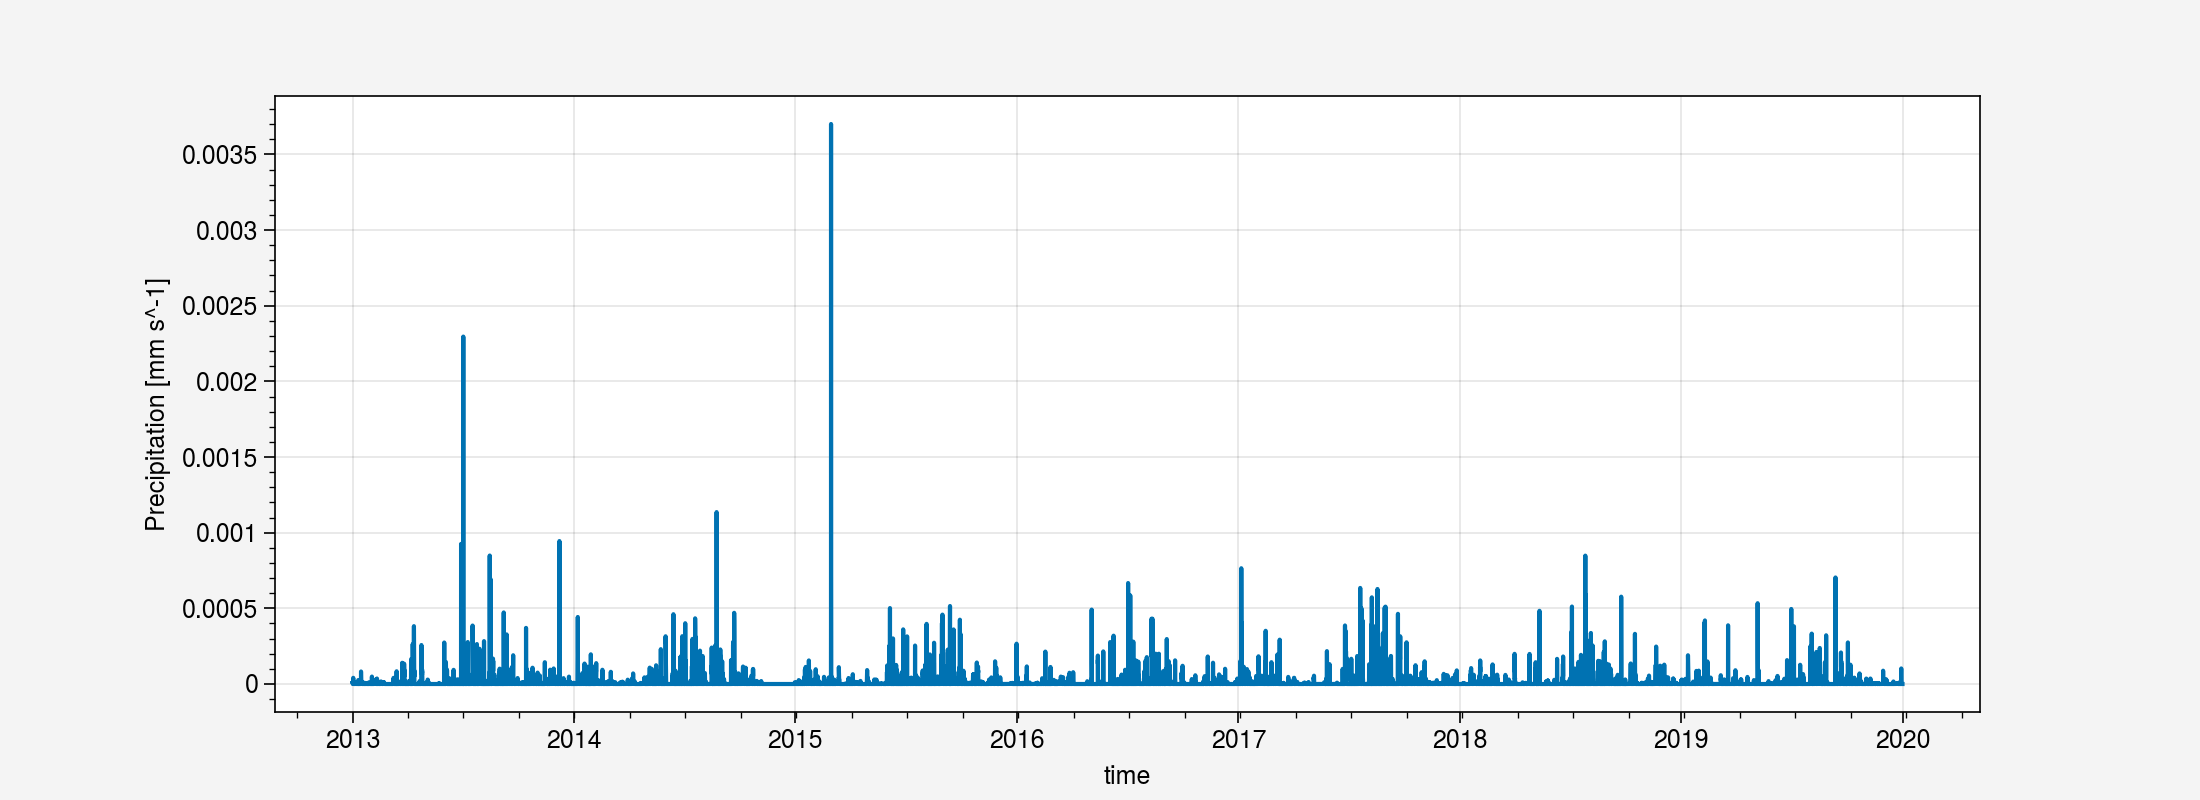

In [18]:
%matplotlib inline
ds_CLMInputData.PRECTmms.plot(figsize=(11,4))
# (ds_TVC_CLASSIC_2013_2020.Precip_daily/86400).plot(marker='.')

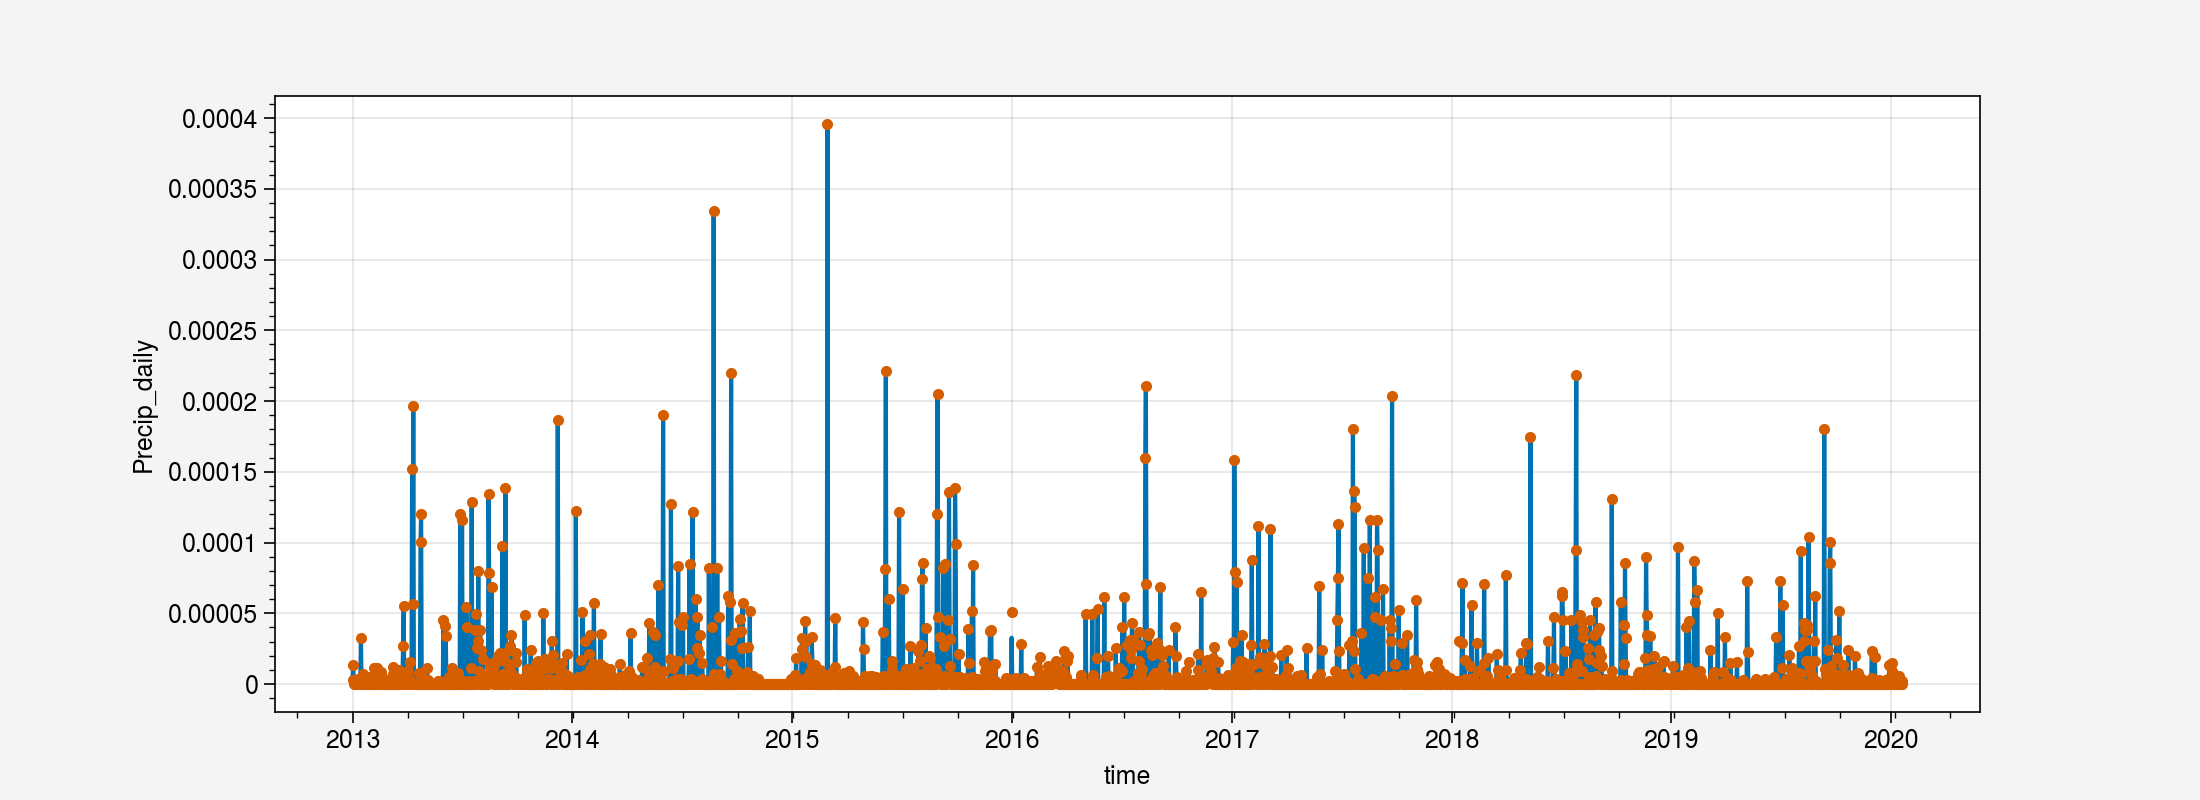

In [21]:
%matplotlib inline
ds_CLMInputData.PRECTmms.resample(time='D').mean().plot(figsize=(11,4))
(ds_TVC_CLASSIC_2013_2020.Precip_daily/86400).plot(marker='.')

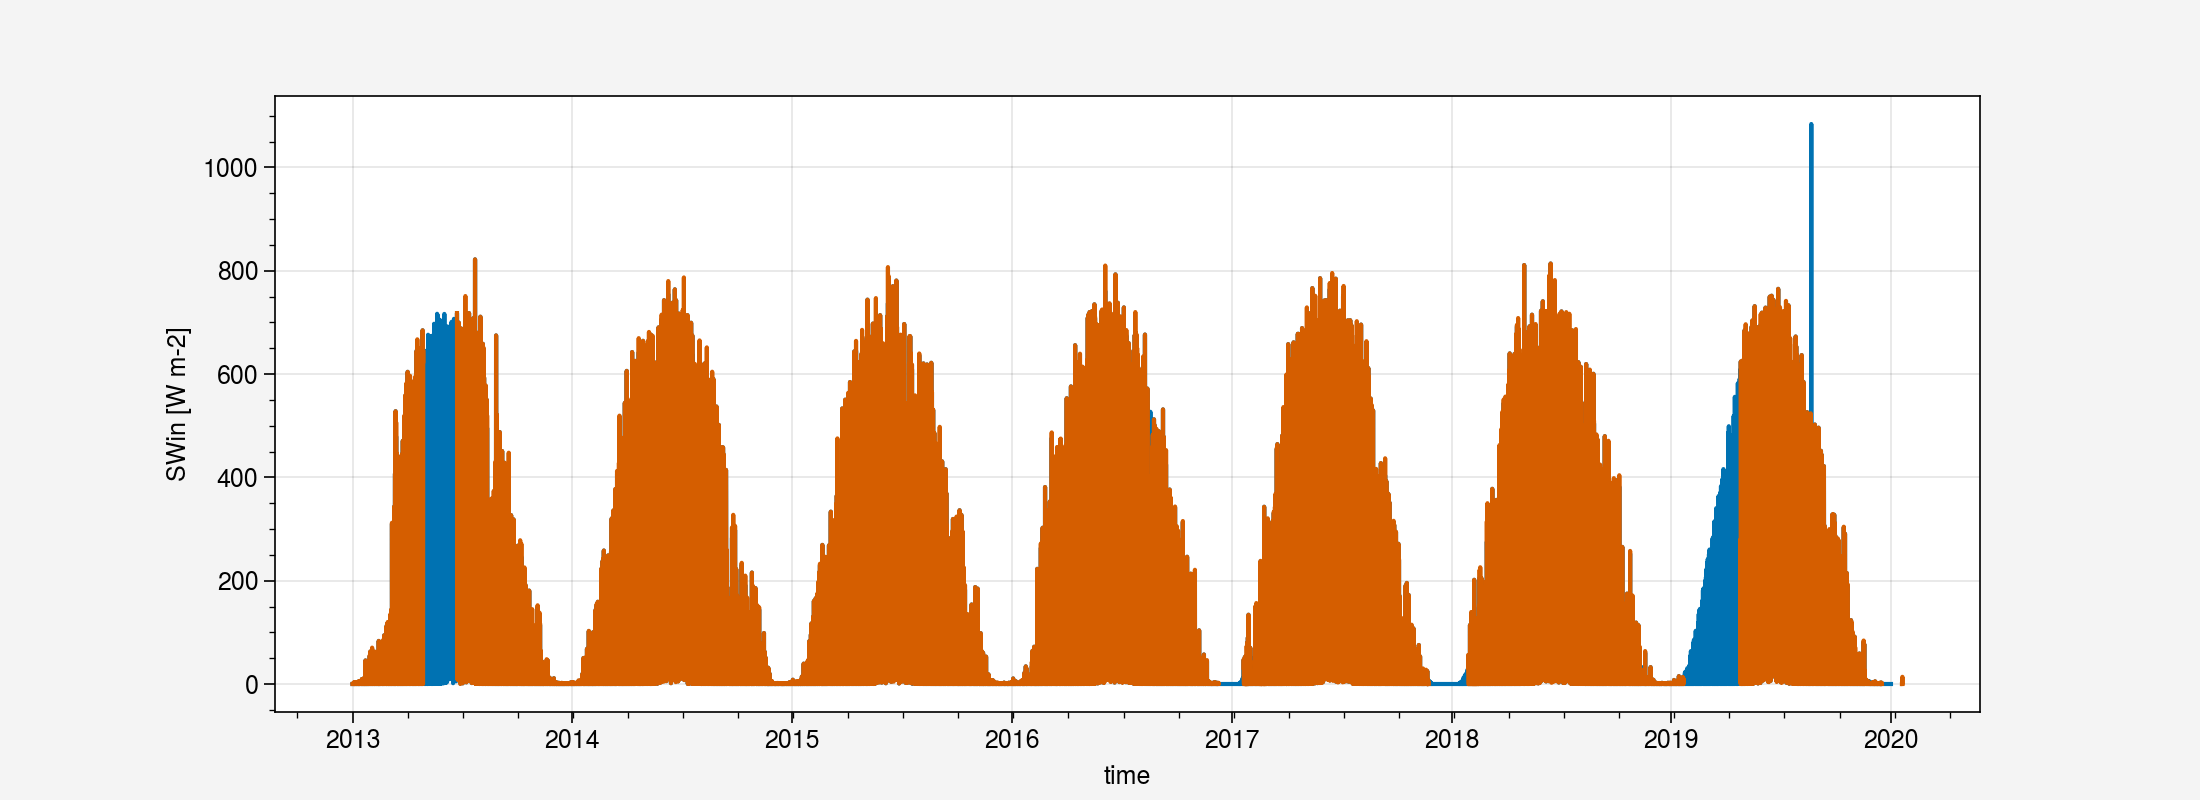

In [111]:
%matplotlib inline
ds_CLMInputData.FSDS.plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.SWin.plot()

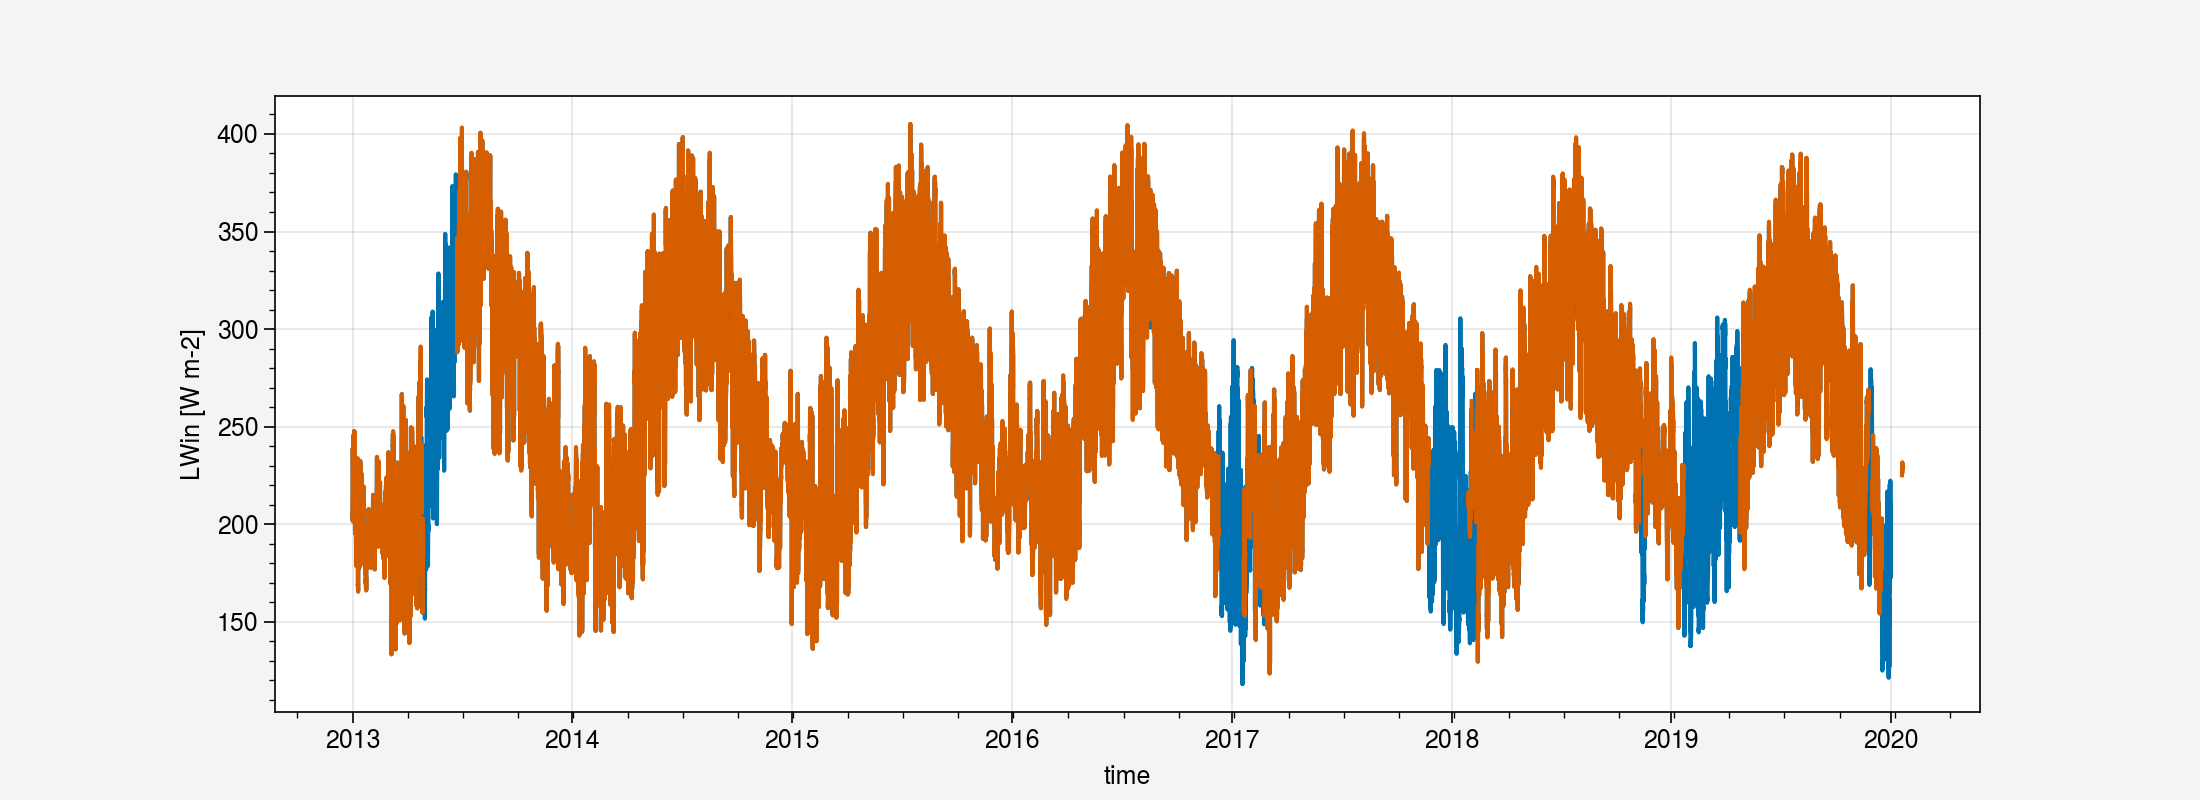

In [113]:
%matplotlib inline
ds_CLMInputData.FLDS.plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.LWin.plot()

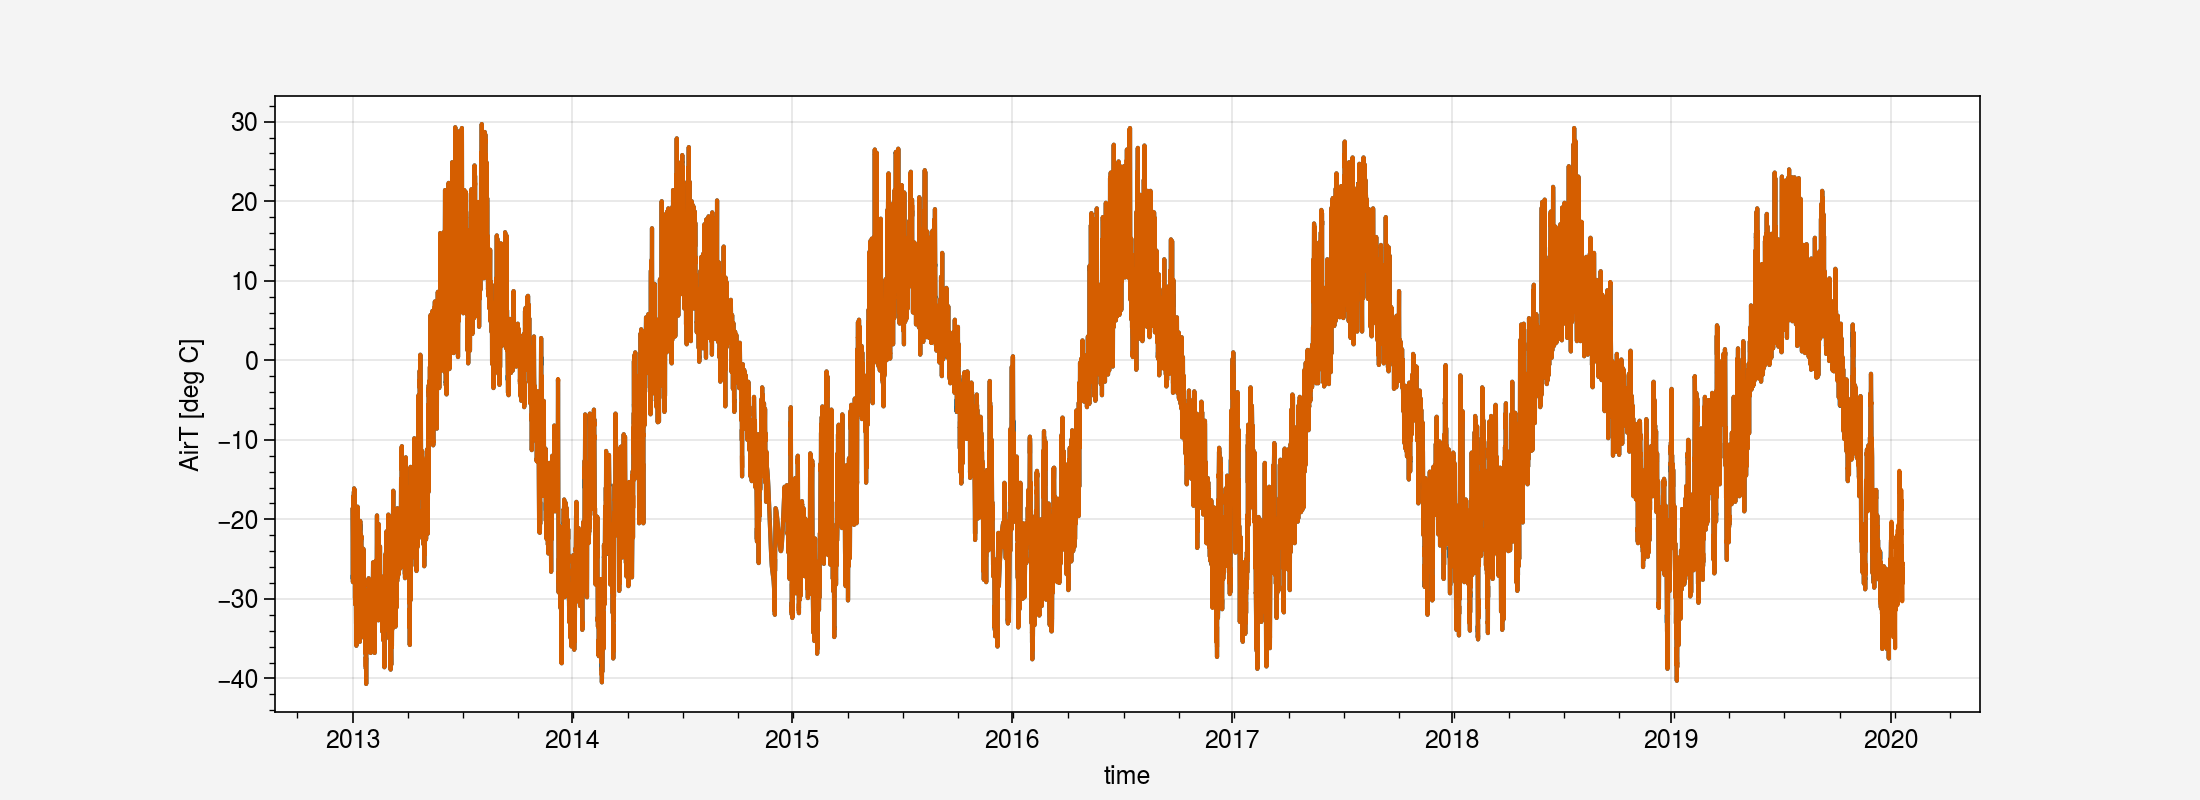

In [118]:
%matplotlib inline
(ds_CLMInputData.TBOT-273.15).plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.AirT.plot()

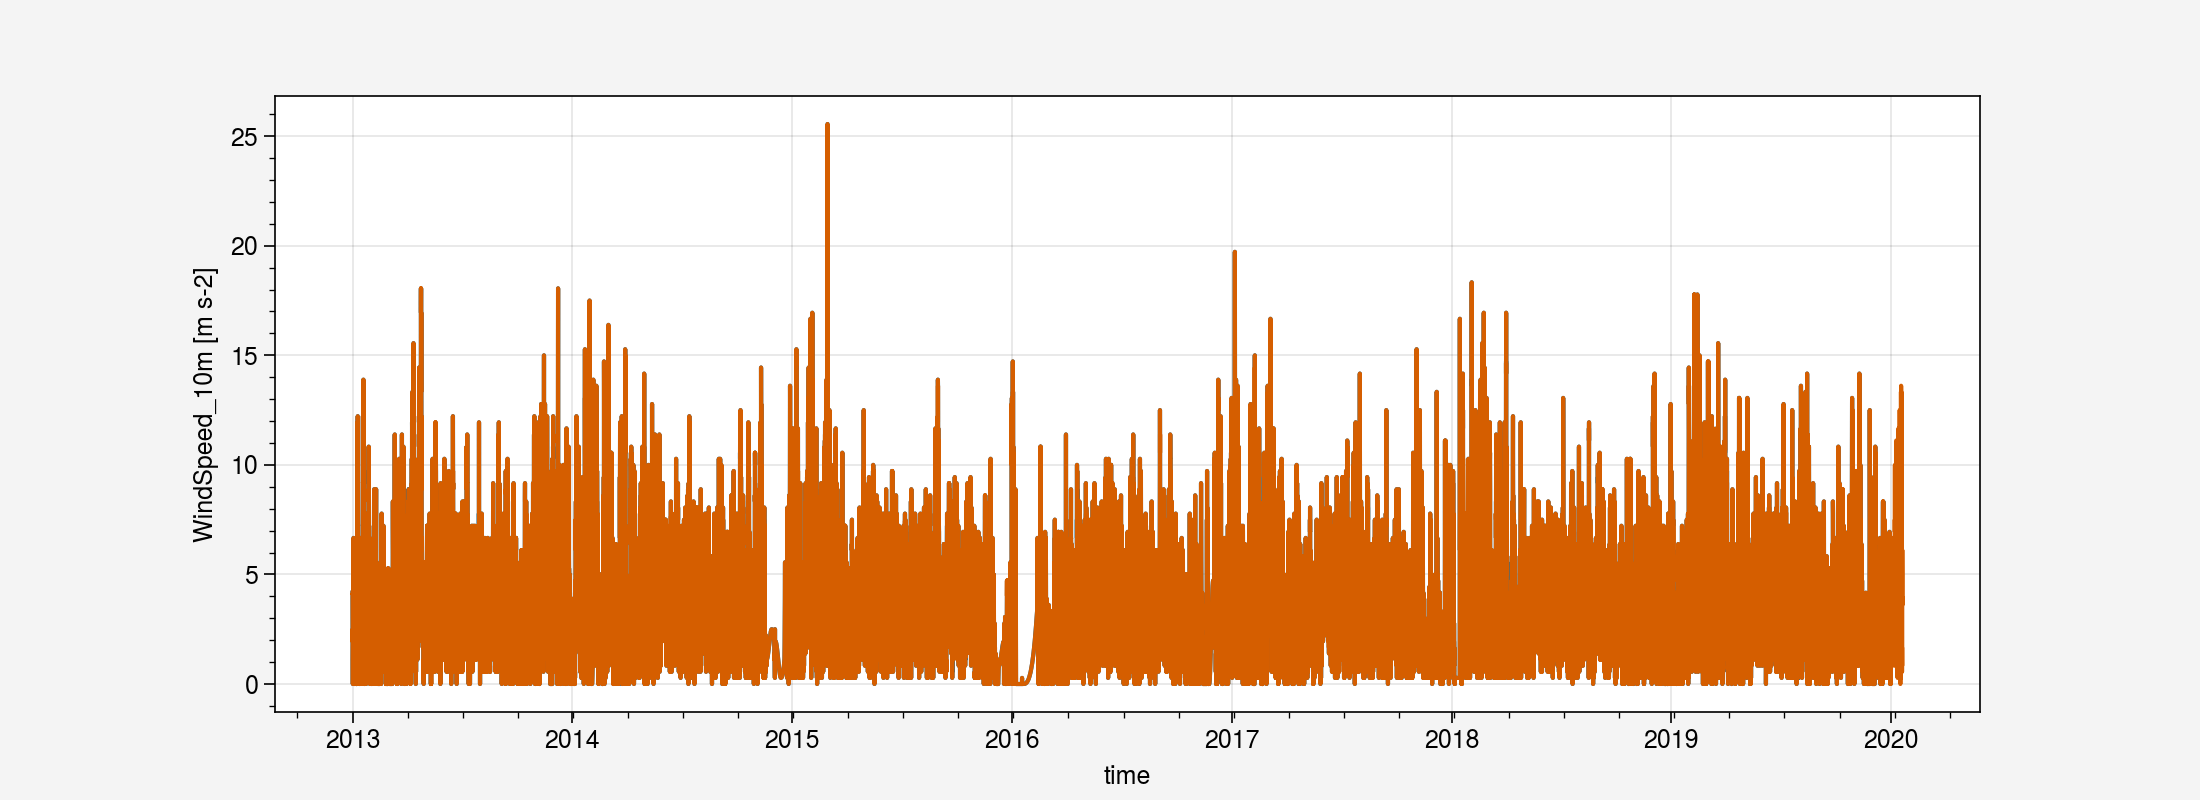

In [121]:
%matplotlib inline
ds_CLMInputData.WIND.plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.WindSpeed_10m.plot()

In [122]:
ds_TVC_CLASSIC_2013_2020

<xarray.Dataset> Size: 33MB
Dimensions:            (time: 123607)
Coordinates:
  * time               (time) datetime64[ns] 989kB 2013-01-01 ... 2020-01-20T...
Data variables: (12/32)
    SWin               (time) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (time) float64 989kB 0.0 0.014 0.0 ... 0.316 0.084 0.057
    LWin               (time) float64 989kB 238.0 237.7 236.7 ... 228.9 227.0
    LWout              (time) float64 989kB 238.3 237.9 237.2 ... 232.3 231.9
    albedo             (time) float64 989kB 0.755 nan nan 0.643 ... nan nan nan
    AirT               (time) float64 989kB -18.8 -19.07 -19.2 ... -26.65 -27.1
    ...                 ...
    H_filt             (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    NEE_filled         (time) float64 989kB nan nan nan ... 0.05 0.4015 0.3455
    LE_filled          (time) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    CH4_filt           (time) float64 989kB nan nan nan nan ... nan nan nan nan
    CH4_filled         (time) float64 989kB nan nan nan nan ... nan nan nan nan

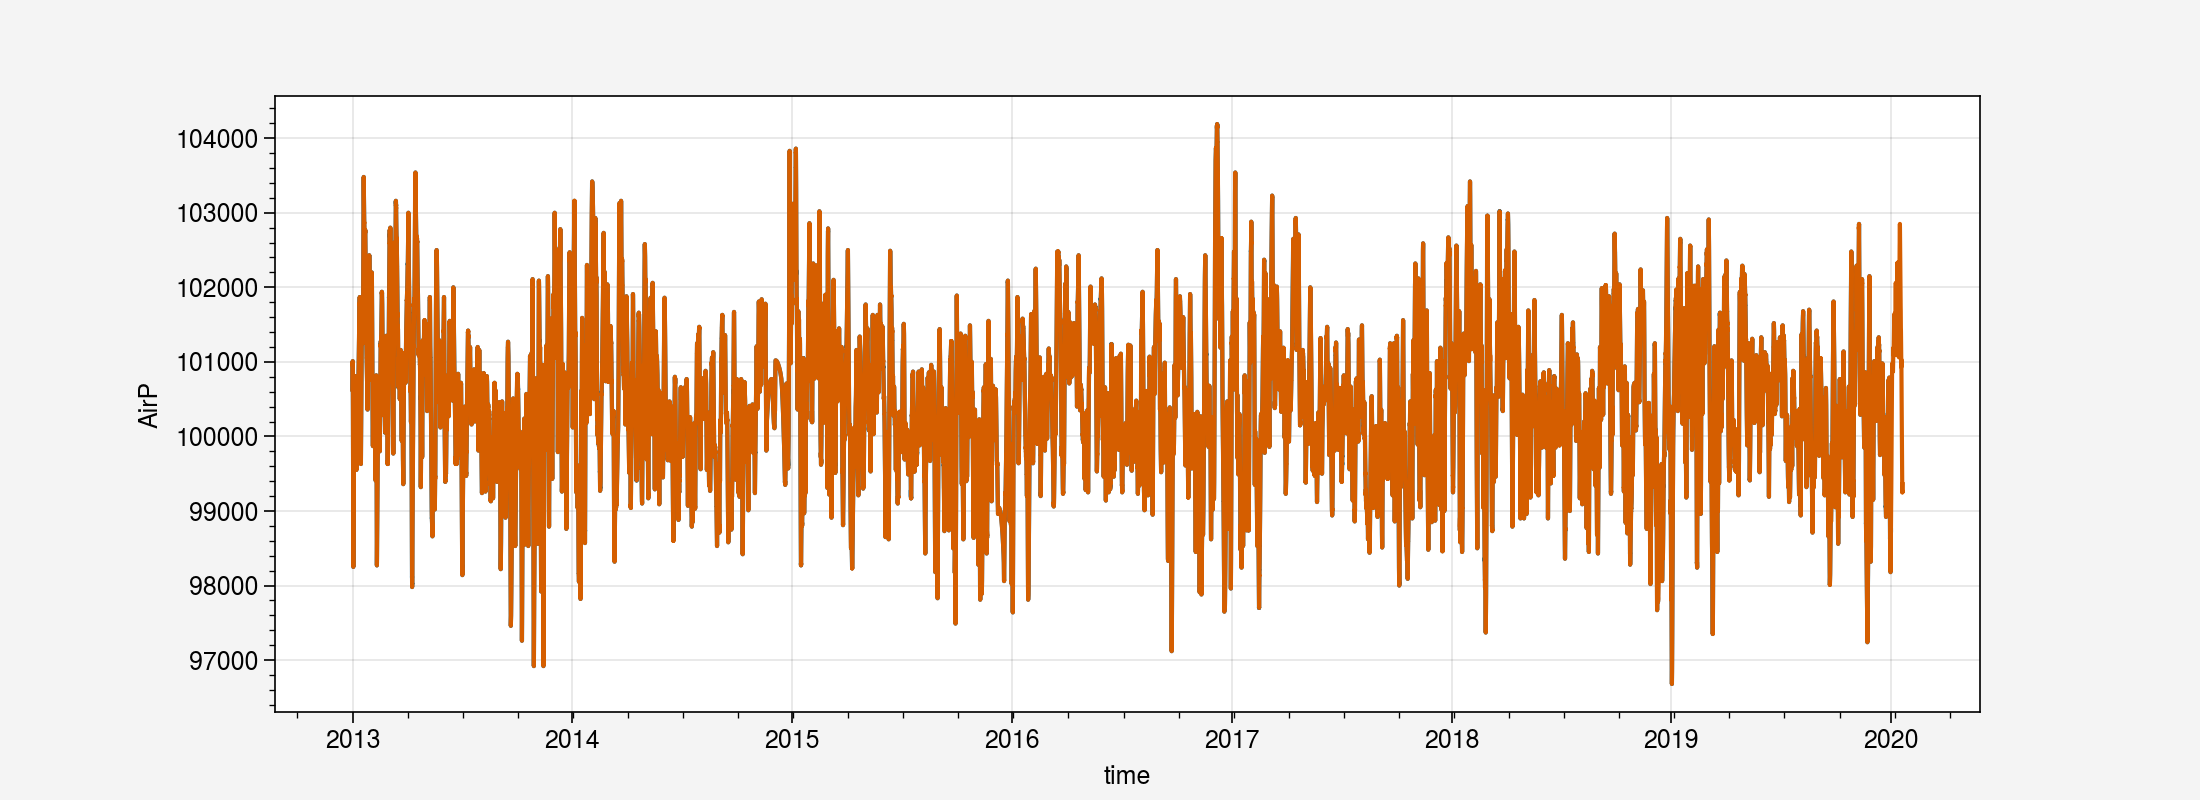

In [129]:
%matplotlib inline
ds_CLMInputData.PSRF.plot(figsize=(11,4))
(ds_TVC_CLASSIC_2013_2020.AirP*1000).plot()

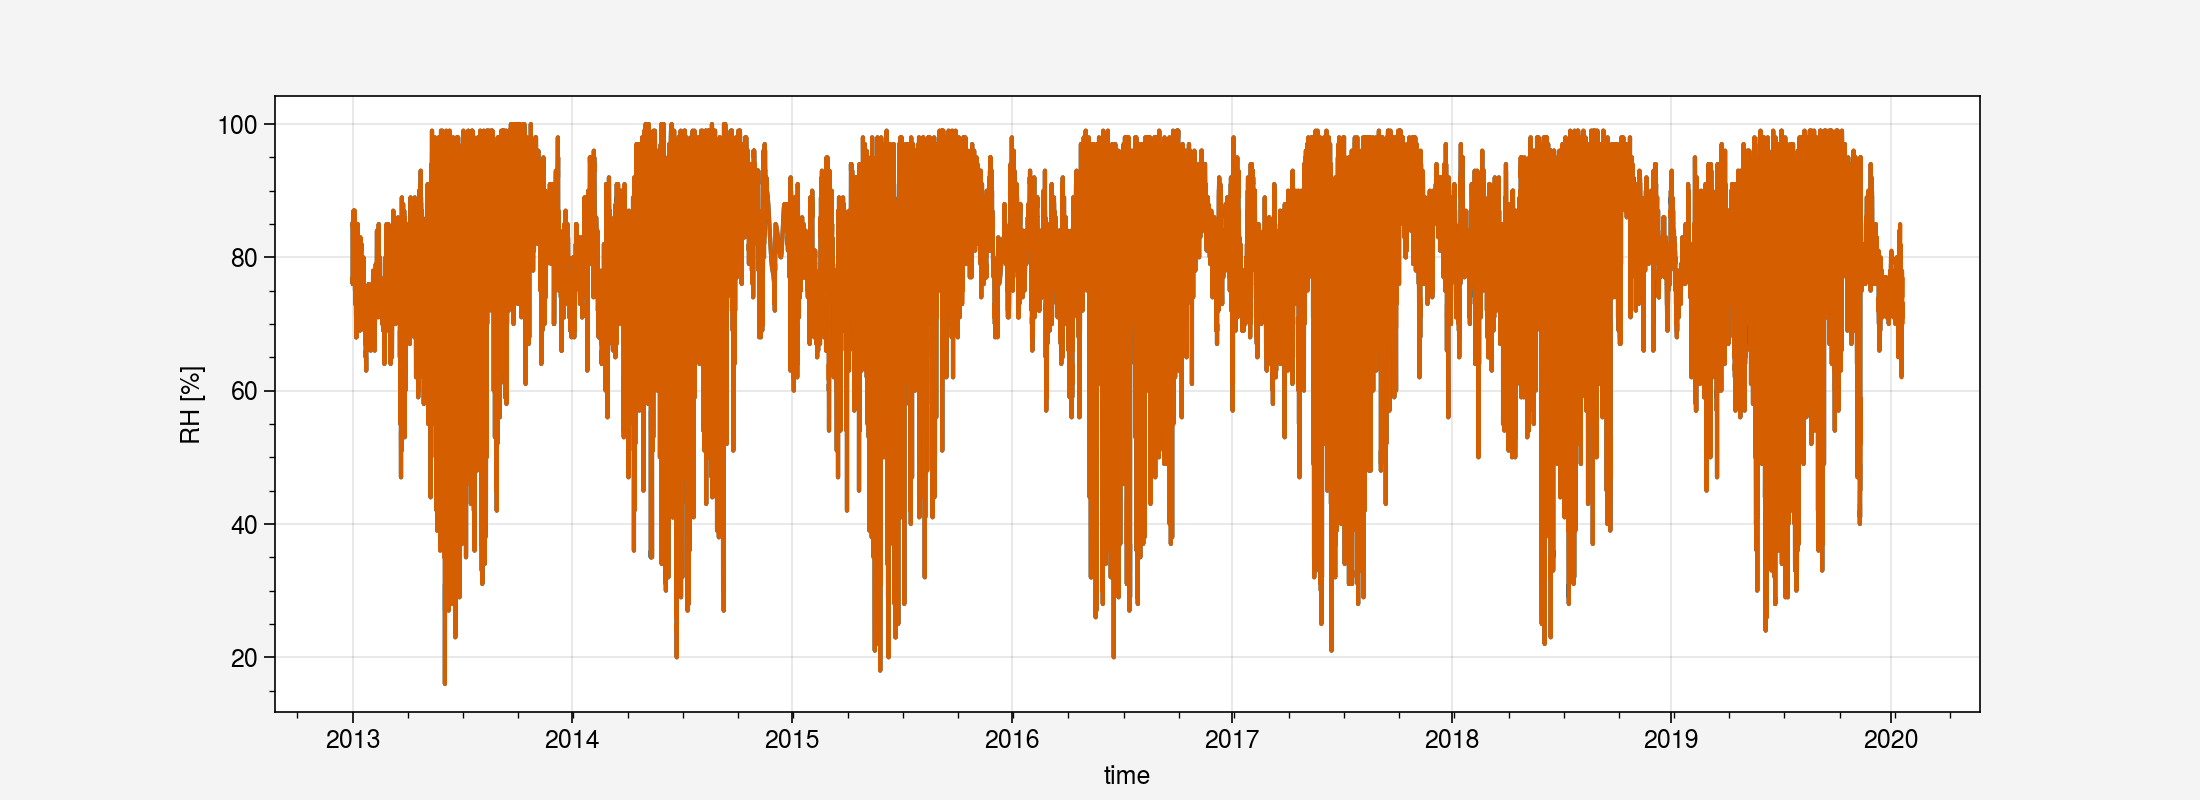

In [130]:
%matplotlib inline
ds_CLMInputData.RH.plot(figsize=(11,4))
(ds_TVC_CLASSIC_2013_2020.RH).plot()

## Validation

### Boike-etal_TVCsoil

In [137]:
df_Boike_TVCsoil = pd.read_csv(path+'/Boike-etal_TVCsoil/datasets/TVCsoil_lv1_2016.tab', skiprows=68, sep='\t', parse_dates=['Date/Time (UTC)'], index_col=['Date/Time (UTC)'])
df_Boike_TVCsoil

,"T soil [°C] (at 2 cm depth, Platinum resis...)",QF soil temp (at 2 cm depth),"T soil [°C] (at 5 cm depth, Platinum resis...)",QF soil temp (at 5 cm depth),"T soil [°C] (at 10cm depth, Platinum resis...)",QF soil temp (at 10cm depth),"T soil [°C] (at 20 cm depth, Platinum resi...)",QF soil temp (at 20 cm depth),"Cond [mS/m] (at 2 cm depth, Time-domain re...)",QF conduct (at 2 cm depth),...,"Soil moisture vol (at 10cm depth, Time-domain re...)",QF soil moist (at 10cm depth),"Soil moisture vol (at 20 cm depth, Time-domain r...)",QF soil moist (at 20 cm depth),"Soil moisture vol (vertical down, 0-15cm depth, ...)","QF soil moist (vertical down, 0-15cm depth, ...)","Soil moisture vol (vertical down, 0-15cm depth, ...).1","QF soil moist (vertical down, 0-15cm depth, ...).1","Soil moisture vol (vertical down, 0-15cm depth, ...).2","QF soil moist (vertical down, 0-15cm depth, ...).2"
Date/Time (UTC),,,,,,,,,,,,,,,,,,,,,
2016-08-26 23:00:00,10.764,3,7.260,3,6.393,3,5.557,3,0.000,3,...,NaN,3,NaN,3,0.000,3,0.000,3,0.000,3
2016-08-27 00:00:00,10.314,0,7.347,0,6.534,0,5.670,0,1.921,0,...,0.3195,0,0.4227,0,0.327,0,0.189,0,0.397,0
2016-08-27 01:00:00,9.961,0,7.381,0,6.650,0,5.754,0,1.915,0,...,0.3195,0,0.4251,0,0.328,0,0.189,0,0.396,0
2016-08-27 02:00:00,10.181,0,7.358,0,6.693,0,5.807,0,1.892,0,...,0.3193,0,0.4242,0,0.333,0,0.192,0,0.396,0
2016-08-27 03:00:00,9.819,0,7.417,0,6.737,0,5.829,0,1.909,0,...,0.3177,0,0.4271,0,0.328,0,0.189,0,0.398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,-9.232,0,-9.292,0,-9.086,0,-8.979,0,0.808,0,...,0.0685,0,0.0829,0,0.396,6,0.034,0,0.022,0
2016-12-31 20:00:00,-9.198,0,-9.203,0,-9.055,0,-8.951,0,0.825,0,...,0.0699,0,0.0933,0,0.111,6,0.033,0,0.018,0
2016-12-31 21:00:00,-9.335,0,-9.194,0,-9.001,0,-8.911,0,0.826,0,...,0.0765,0,0.0880,0,0.115,6,0.034,0,0.021,0


In [140]:
ds_Boike_TVCsoil = df_Boike_TVCsoil.to_xarray()
ds_Boike_TVCsoil = ds_Boike_TVCsoil.rename({'Date/Time (UTC)': 'time'})
ds_Boike_TVCsoil

<xarray.Dataset> Size: 1MB
Dimensions:                                                 (time: 3049)
Coordinates:
  * time                                                    (time) datetime64[ns] 24kB ...
Data variables: (12/50)
    T soil [°C] (at 2 cm depth, Platinum resis...)          (time) float64 24kB ...
    QF soil temp (at 2 cm depth)                            (time) int64 24kB ...
    T soil [°C] (at 5 cm depth, Platinum resis...)          (time) float64 24kB ...
    QF soil temp (at 5 cm depth)                            (time) int64 24kB ...
    T soil [°C] (at 10cm depth, Platinum resis...)          (time) float64 24kB ...
    QF soil temp (at 10cm depth)                            (time) int64 24kB ...
    ...                                                      ...
    Soil moisture vol (vertical down, 0-15cm depth, ...)    (time) float64 24kB ...
    QF soil moist (vertical down, 0-15cm depth, ...)        (time) int64 24kB ...
    Soil moisture vol (vertical down, 0-15cm depth, ...).1  (time) float64 24kB ...
    QF soil moist (vertical down, 0-15cm depth, ...).1      (time) int64 24kB ...
    Soil moisture vol (vertical down, 0-15cm depth, ...).2  (time) float64 24kB ...
    QF soil moist (vertical down, 0-15cm depth, ...).2      (time) int64 24kB ...

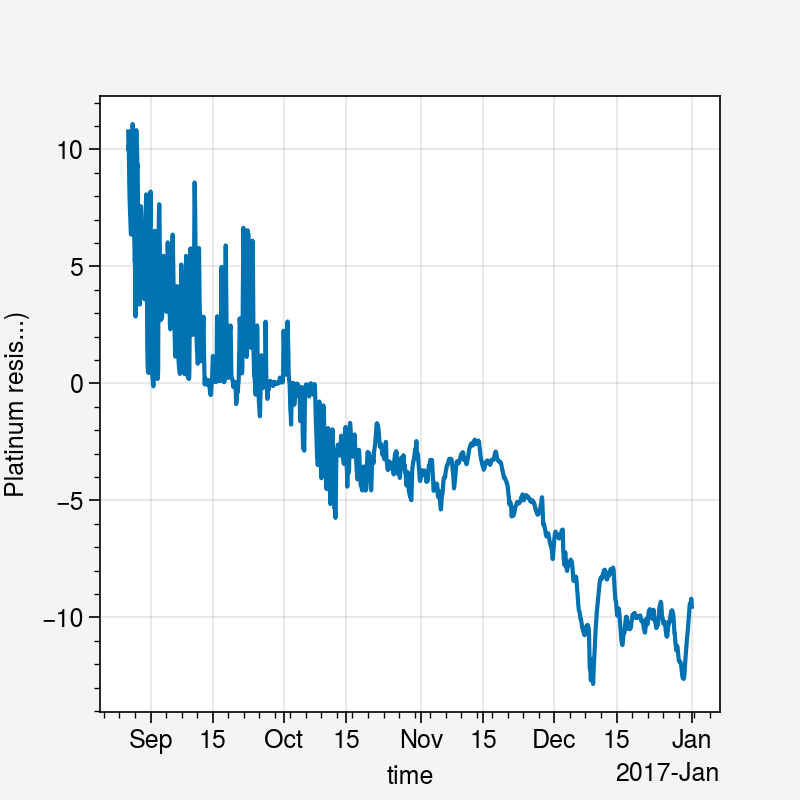

In [142]:
ds_Boike_TVCsoil['T soil [°C] (at 2 cm depth, Platinum resis...)'].plot()

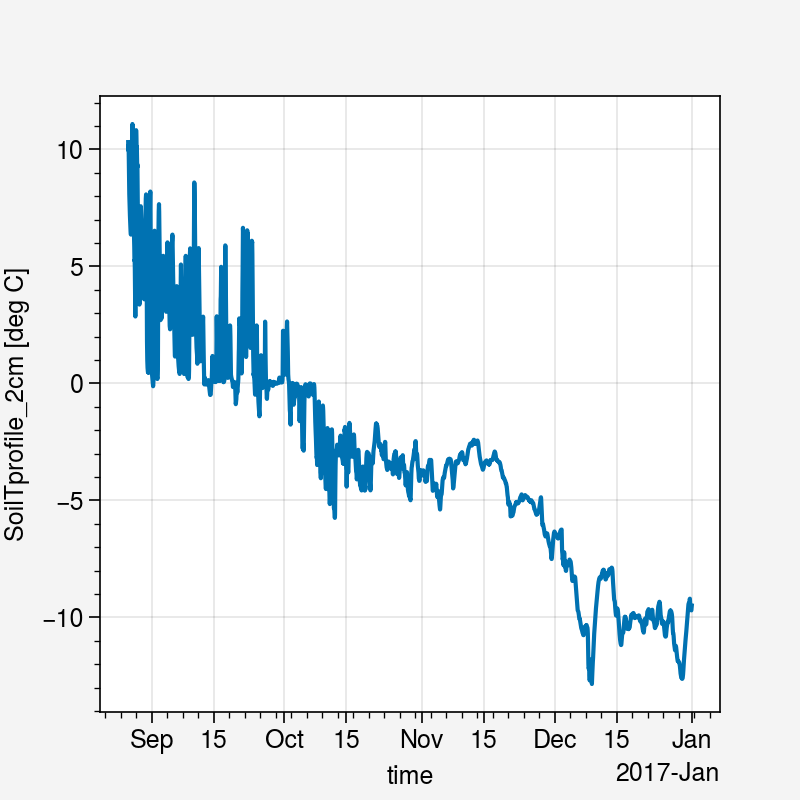

In [148]:
ds_TVC_CLASSIC_2013_2020.SoilTprofile_2cm.sel(time='2016').plot()

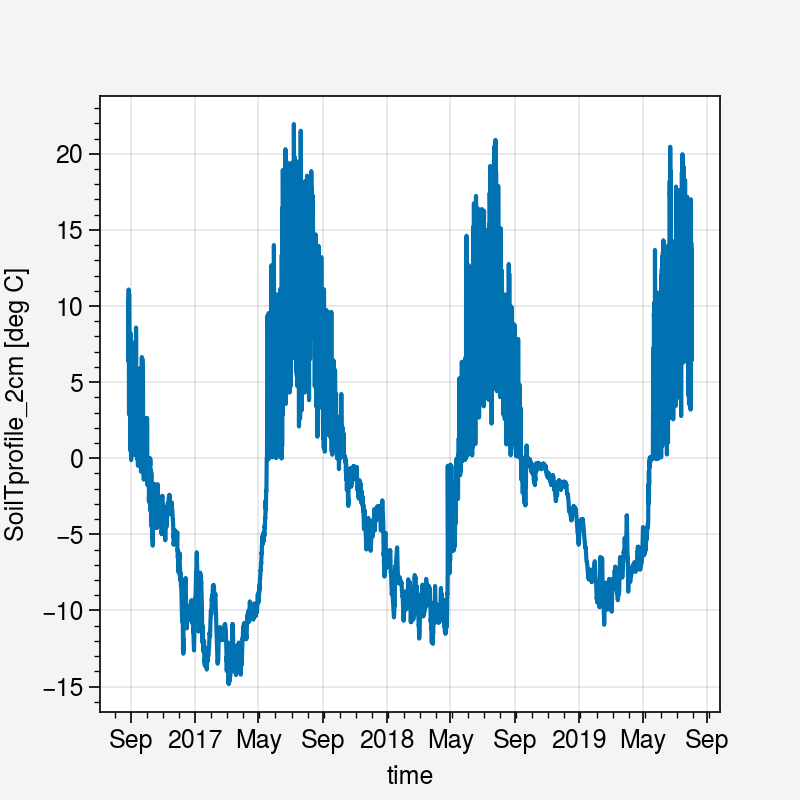

In [149]:
ds_TVC_CLASSIC_2013_2020.SoilTprofile_2cm.plot()

### MSC_Snowdepth

In [151]:
df_MSC_Snowdepth = pd.read_csv(path+'/MSC_Snowdepth.csv', parse_dates=['Timestamps'], index_col=['Timestamps'])
ds_MSC_Snowdepth = df_MSC_Snowdepth.to_xarray()
ds_MSC_Snowdepth = ds_MSC_Snowdepth.rename({'Timestamps': 'time'})
ds_MSC_Snowdepth

<xarray.Dataset> Size: 256kB
Dimensions:    (time: 16009)
Coordinates:
  * time       (time) datetime64[ns] 128kB 2017-09-01 ... 2019-06-30
Data variables:
    SnowDepth  (time) float64 128kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

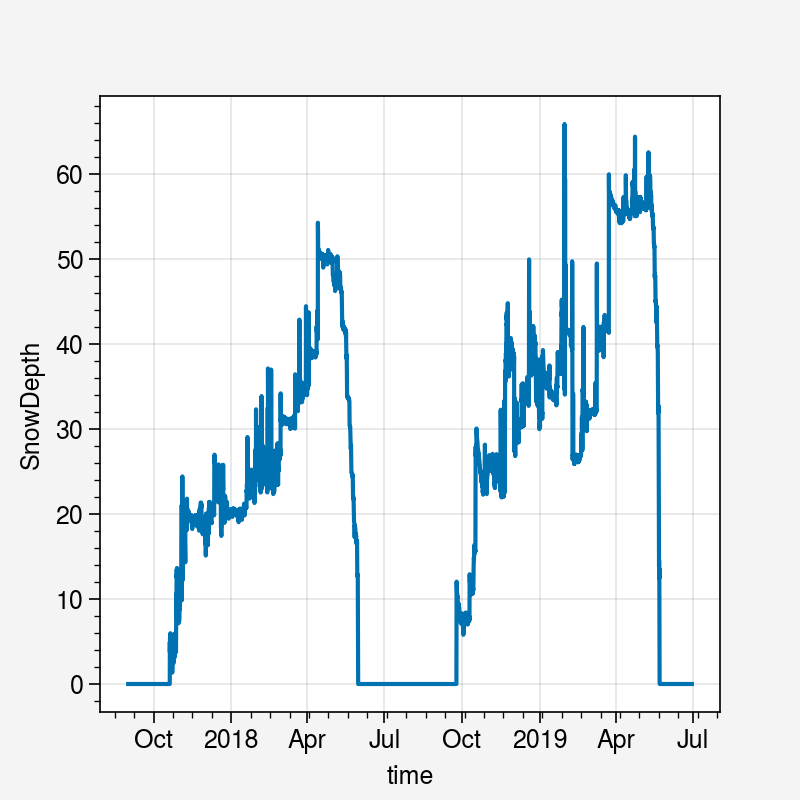

In [152]:
ds_MSC_Snowdepth.SnowDepth.plot()

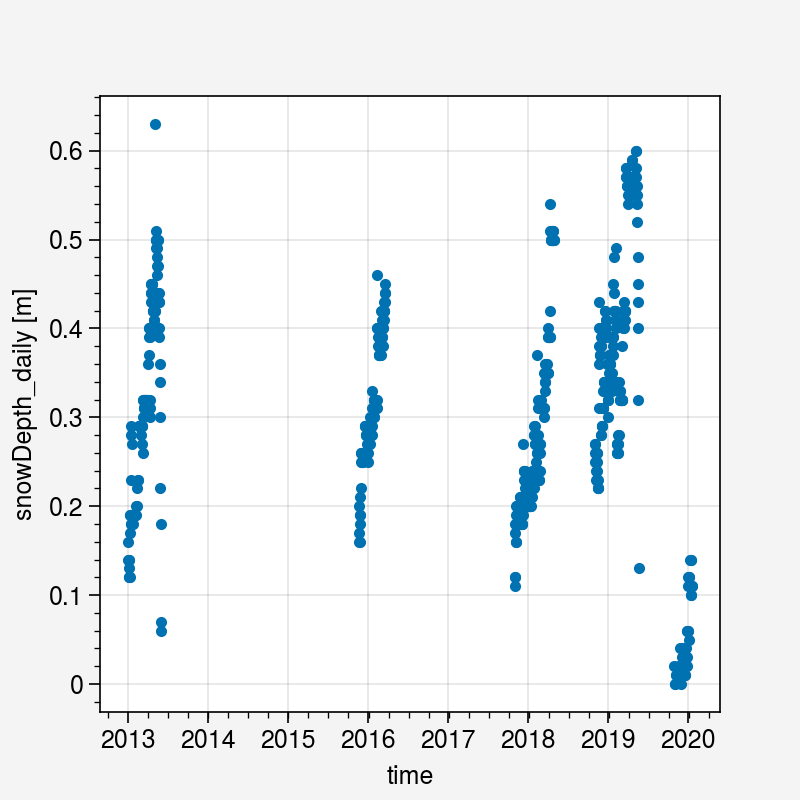

In [155]:
ds_TVC_CLASSIC_2013_2020.snowDepth_daily.plot(marker='.')

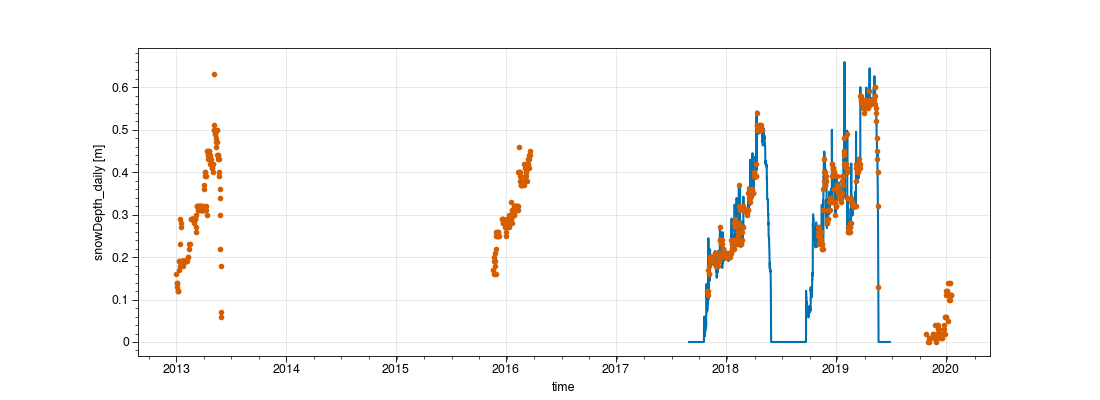

In [158]:
%matplotlib widget
(ds_MSC_Snowdepth.SnowDepth/100).plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.snowDepth_daily.plot(marker='.')

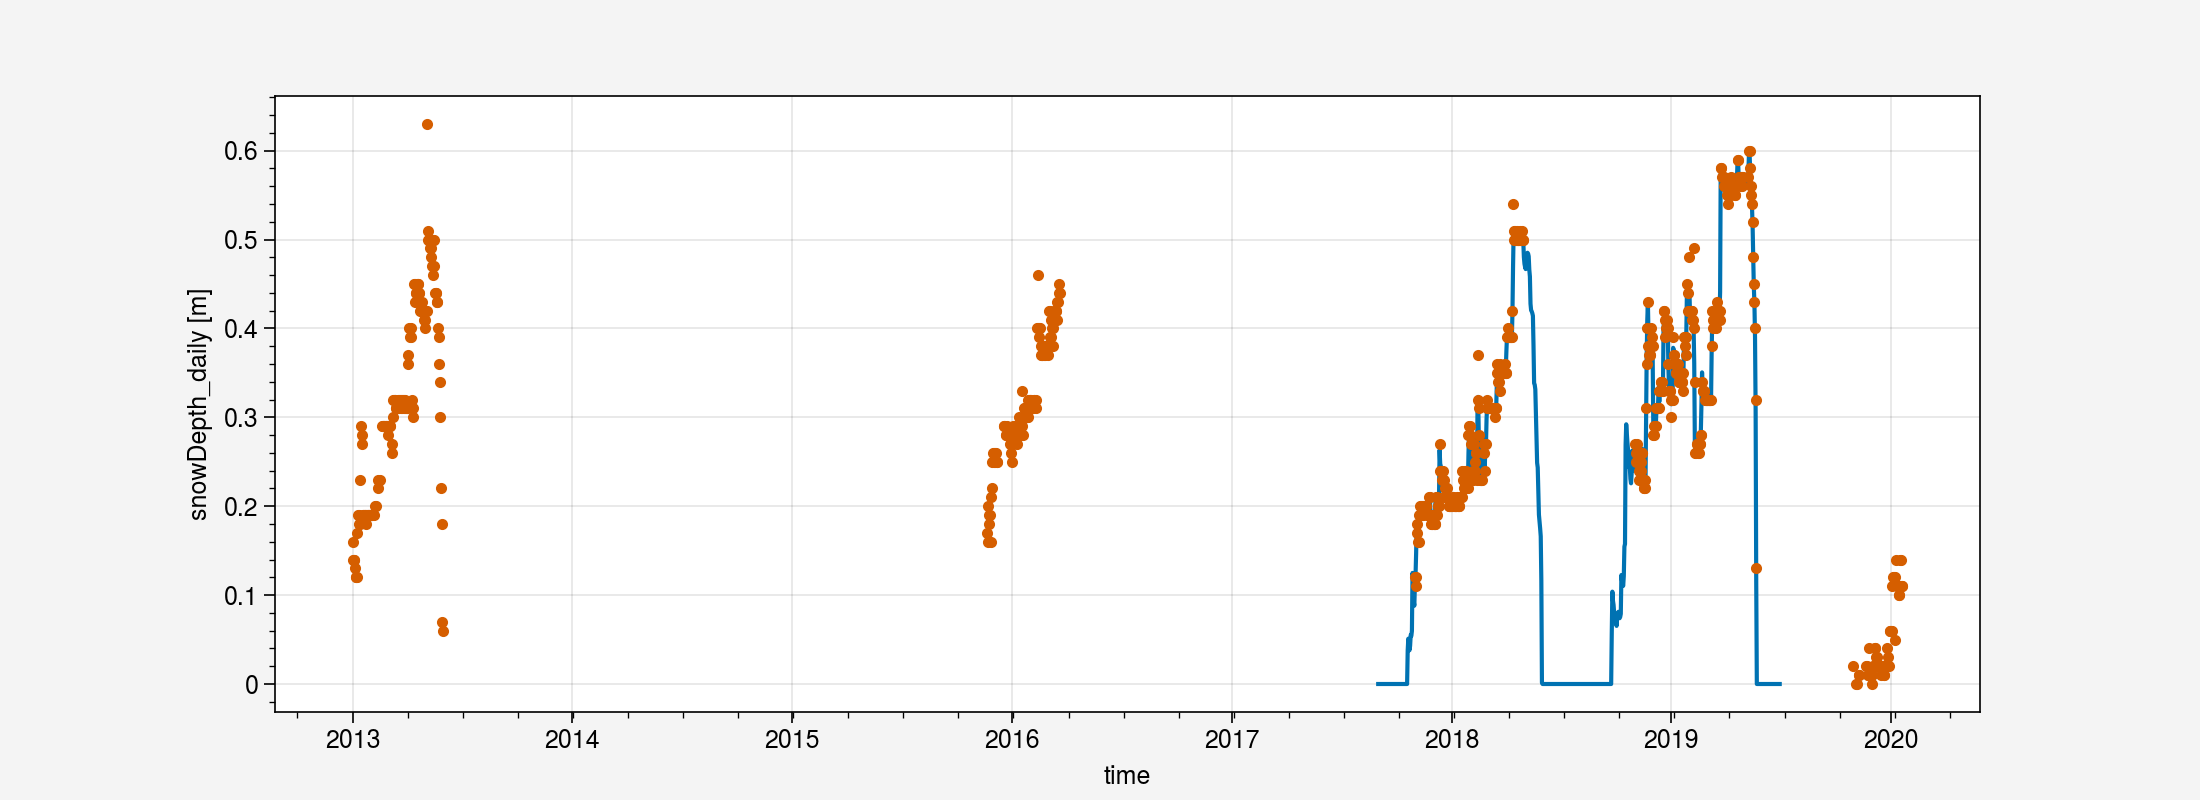

In [161]:
%matplotlib inline
(ds_MSC_Snowdepth.SnowDepth/100).resample(time='D').mean().plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.snowDepth_daily.plot(marker='.')

In [160]:
ds_TVC_CLASSIC_2013_2020

<xarray.Dataset> Size: 33MB
Dimensions:            (time: 123607)
Coordinates:
  * time               (time) datetime64[ns] 989kB 2013-01-01 ... 2020-01-20T...
Data variables: (12/32)
    SWin               (time) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (time) float64 989kB 0.0 0.014 0.0 ... 0.316 0.084 0.057
    LWin               (time) float64 989kB 238.0 237.7 236.7 ... 228.9 227.0
    LWout              (time) float64 989kB 238.3 237.9 237.2 ... 232.3 231.9
    albedo             (time) float64 989kB 0.755 nan nan 0.643 ... nan nan nan
    AirT               (time) float64 989kB -18.8 -19.07 -19.2 ... -26.65 -27.1
    ...                 ...
    H_filt             (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    NEE_filled         (time) float64 989kB nan nan nan ... 0.05 0.4015 0.3455
    LE_filled          (time) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    CH4_filt           (time) float64 989kB nan nan nan nan ... nan nan nan nan
    CH4_filled         (time) float64 989kB nan nan nan nan ... nan nan nan nan

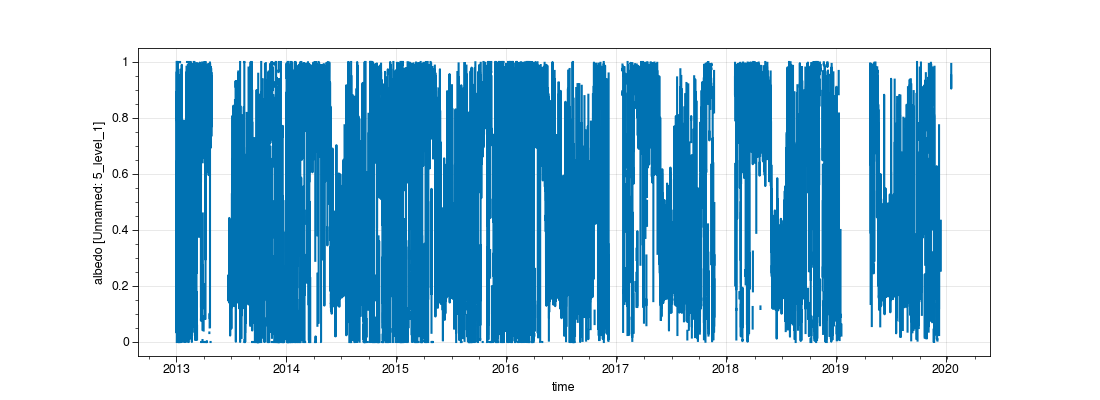

In [164]:
%matplotlib widget
ds_TVC_CLASSIC_2013_2020.albedo.plot(figsize=(11,4))

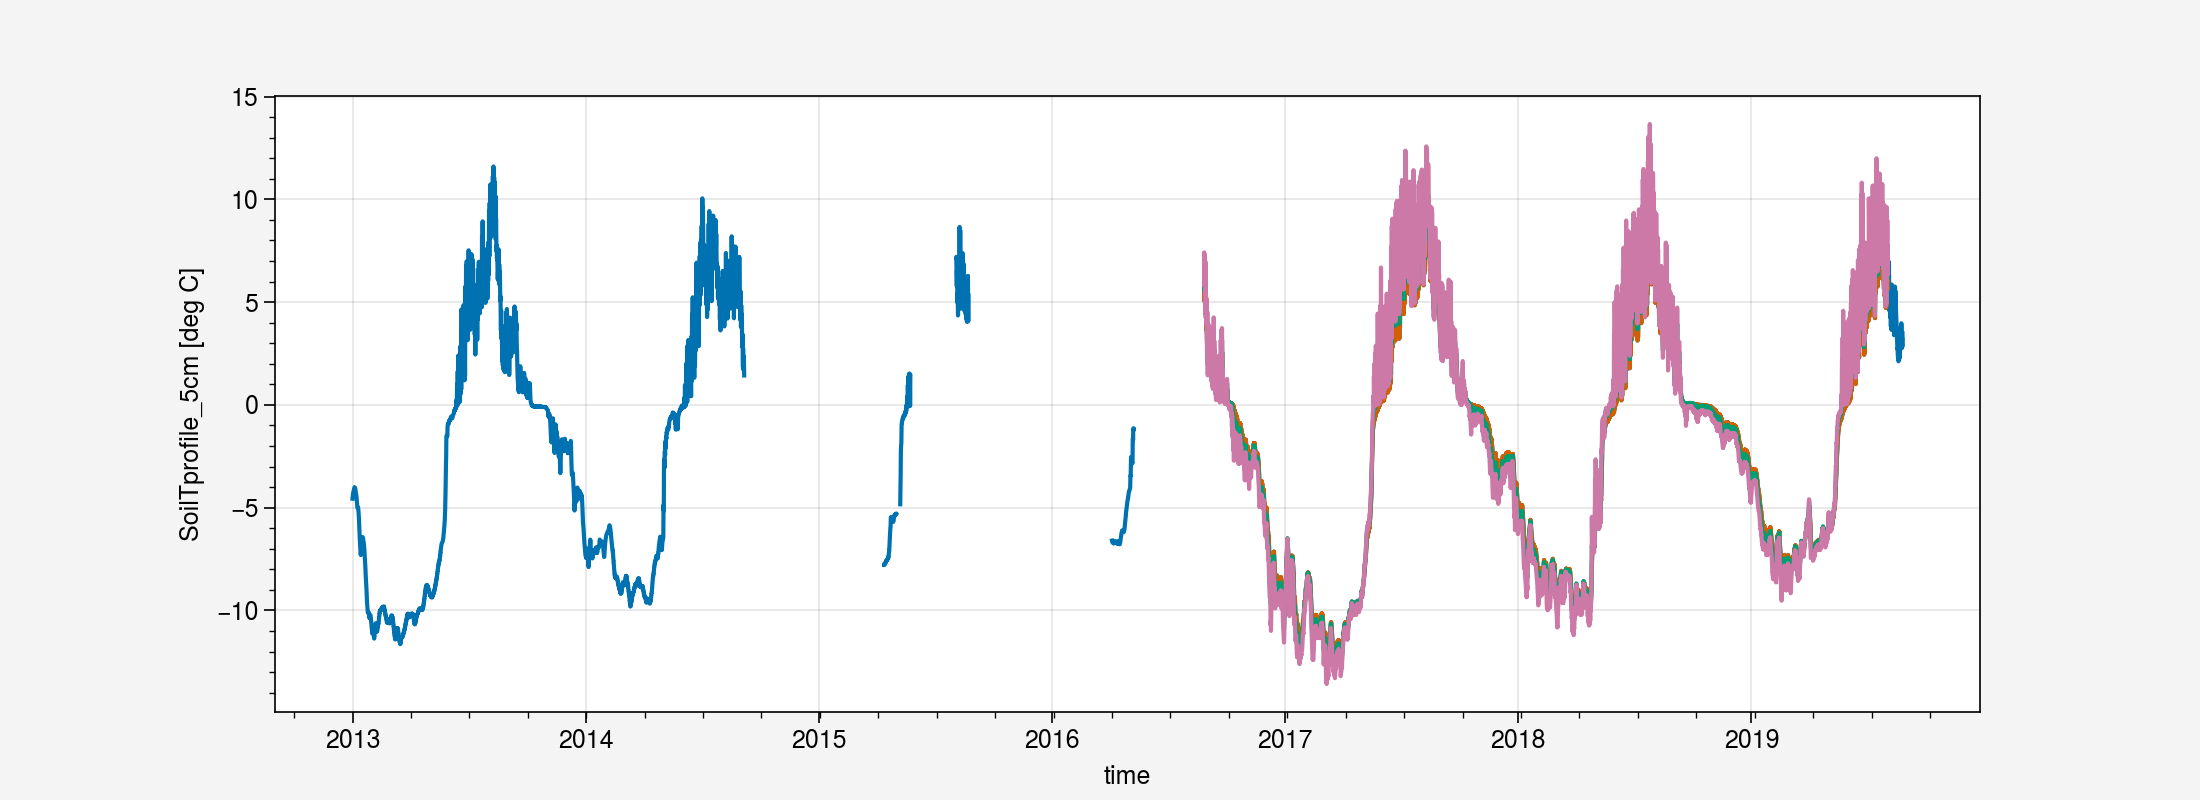

In [170]:
%matplotlib inline
ds_TVC_CLASSIC_2013_2020.SoilT_20cm.plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.SoilTprofile_20cm.plot()
ds_TVC_CLASSIC_2013_2020.SoilTprofile_10cm.plot()
ds_TVC_CLASSIC_2013_2020.SoilTprofile_5cm.plot()

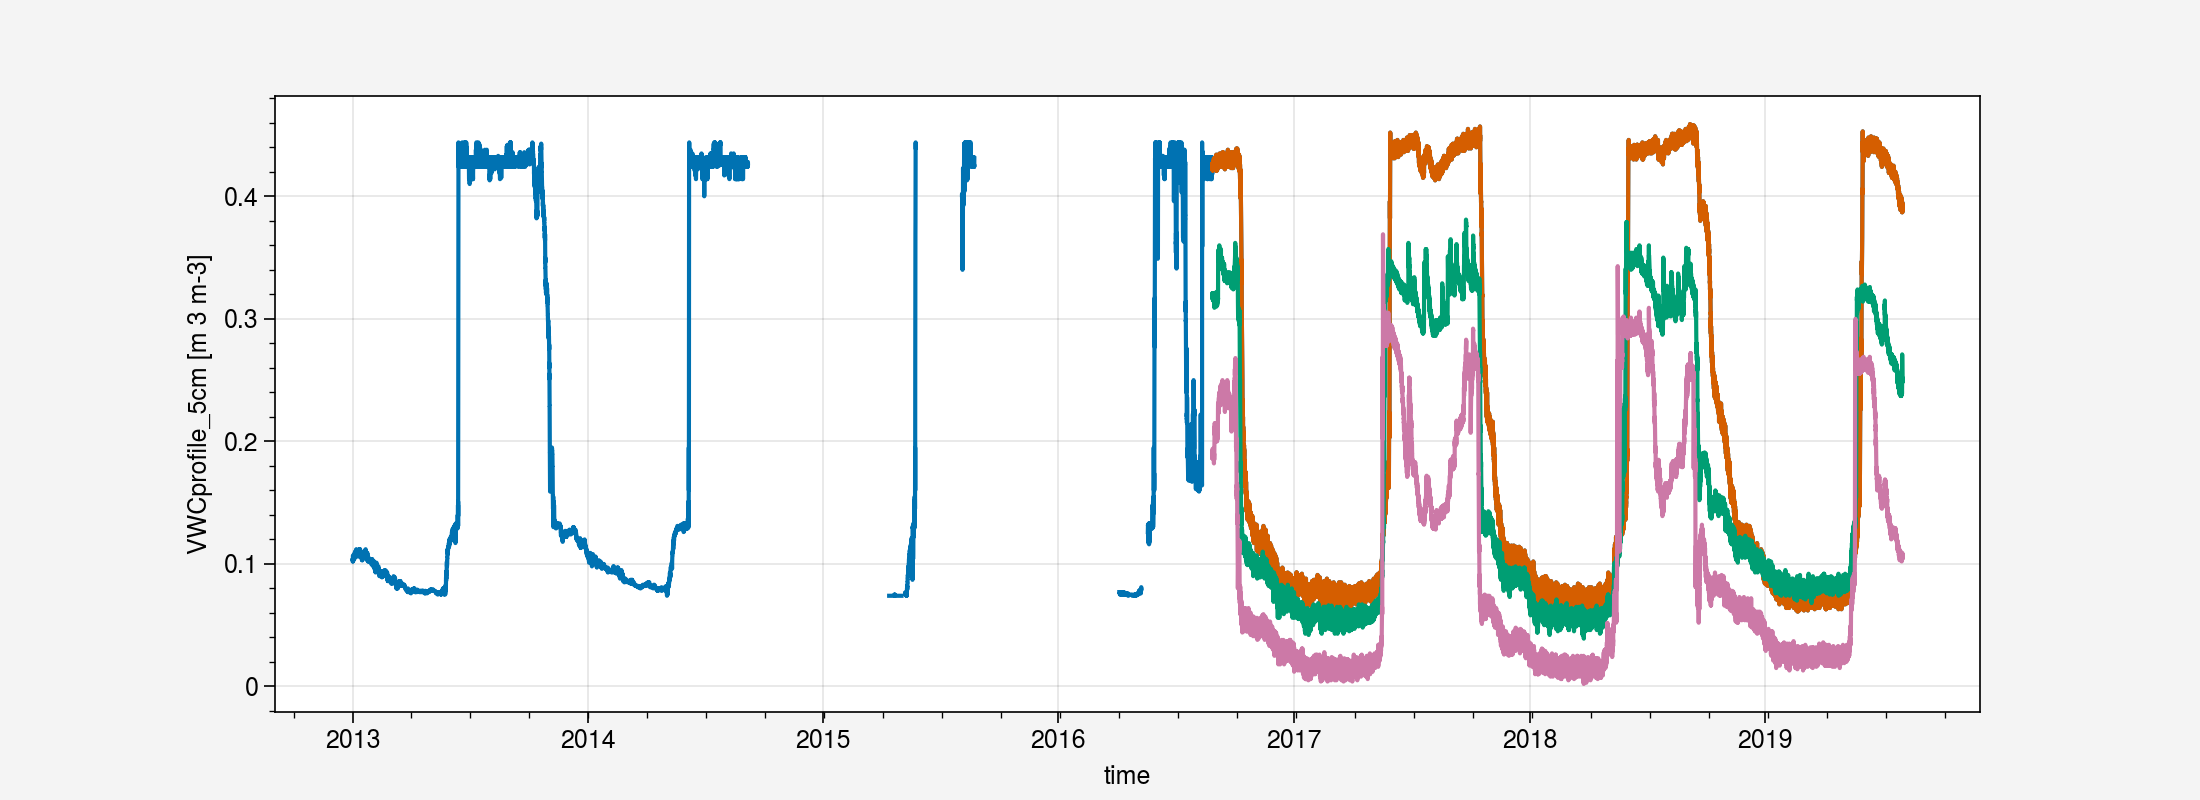

In [171]:
%matplotlib inline
ds_TVC_CLASSIC_2013_2020.VWC_20cm.plot(figsize=(11,4))
ds_TVC_CLASSIC_2013_2020.VWCprofile_20cm.plot()
ds_TVC_CLASSIC_2013_2020.VWCprofile_10cm.plot()
ds_TVC_CLASSIC_2013_2020.VWCprofile_5cm.plot()

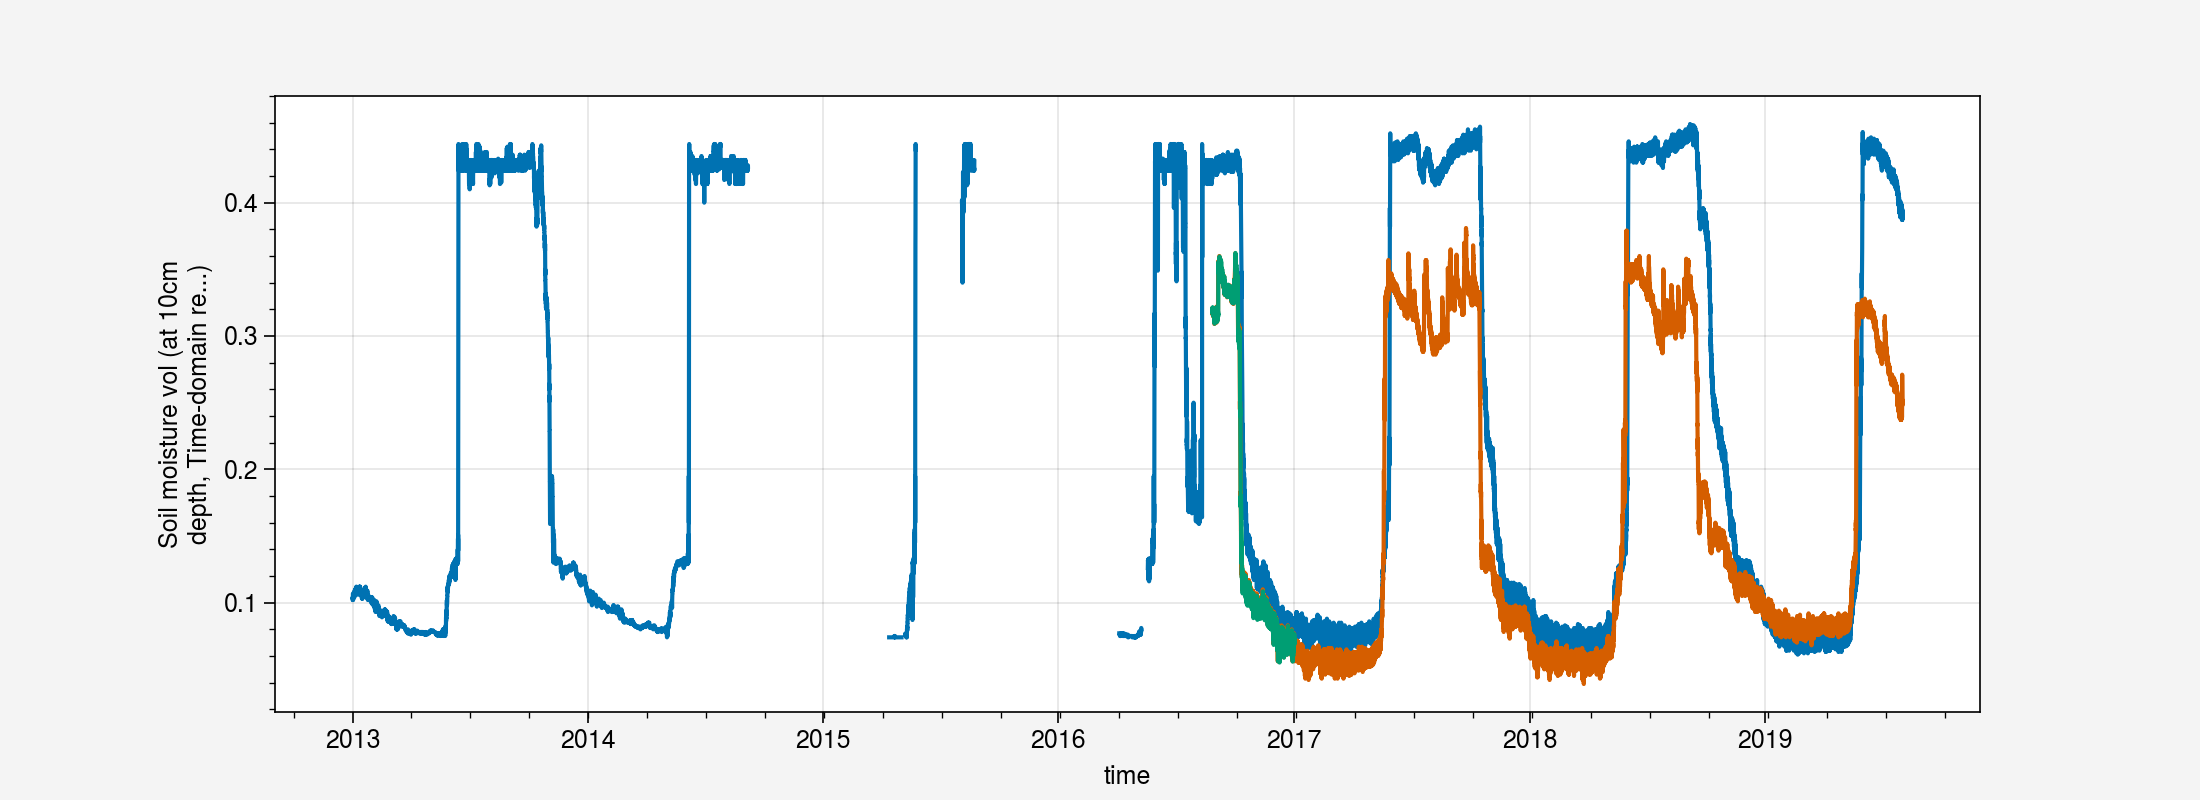

In [176]:
%matplotlib inline
ds_TVC_CLASSIC_2013_2020.VWC_20cm.plot(figsize=(11,4))
# ds_TVC_CLASSIC_2013_2020.VWCprofile_20cm.plot()
ds_TVC_CLASSIC_2013_2020.VWCprofile_10cm.plot()
ds_Boike_TVCsoil['Soil moisture vol (at 10cm depth, Time-domain re...)'].plot()

## Convert evaluation data to SnowMIP format

In [183]:
ds_eval = ds_MSC_Snowdepth.copy()
ds_eval = ds_eval.rename({'SnowDepth': 'snd_auto'})
ds_eval['snd_auto'].attrs = {'name': 'Snow Depth', 'unit': 'm'}
ds_eval.attrs = {
    'location': 'Trail Valley Creak',
    'ref': 'https://doi.org/10.5194/tc-16-4201-2022',
    'soil_ref': 'https://doi.pangaea.de/10.1594/PANGAEA.962726',
    'downloaded': '13/10/2024 by Mickaël Lalande',
    'merge': 'TVCSnowCLM/TVCMetData/MSC_Snowdepth.csv and TVC_CLASSIC_2013_2020.csv',
}
ds_eval

<xarray.Dataset> Size: 256kB
Dimensions:   (time: 16009)
Coordinates:
  * time      (time) datetime64[ns] 128kB 2017-09-01 ... 2019-06-30
Data variables:
    snd_auto  (time) float64 128kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    location:    Trail Valley Creak
    ref:         https://doi.org/10.5194/tc-16-4201-2022
    soil_ref:    https://doi.pangaea.de/10.1594/PANGAEA.962726
    downloaded:  13/10/2024 by Mickaël Lalande
    merge:       TVCSnowCLM/TVCMetData/MSC_Snowdepth.csv and TVC_CLASSIC_2013...

In [180]:
ds_TVC_CLASSIC_2013_2020

<xarray.Dataset> Size: 33MB
Dimensions:            (time: 123607)
Coordinates:
  * time               (time) datetime64[ns] 989kB 2013-01-01 ... 2020-01-20T...
Data variables: (12/32)
    SWin               (time) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (time) float64 989kB 0.0 0.014 0.0 ... 0.316 0.084 0.057
    LWin               (time) float64 989kB 238.0 237.7 236.7 ... 228.9 227.0
    LWout              (time) float64 989kB 238.3 237.9 237.2 ... 232.3 231.9
    albedo             (time) float64 989kB 0.755 nan nan 0.643 ... nan nan nan
    AirT               (time) float64 989kB -18.8 -19.07 -19.2 ... -26.65 -27.1
    ...                 ...
    H_filt             (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    NEE_filled         (time) float64 989kB nan nan nan ... 0.05 0.4015 0.3455
    LE_filled          (time) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    CH4_filt           (time) float64 989kB nan nan nan nan ... nan nan nan nan
    CH4_filled         (time) float64 989kB nan nan nan nan ... nan nan nan nan

In [190]:
# Reshape the dataset to gather into two variables `tsl` and `swc`
depths = [2, 5, 10, 20]
depths_m = [0.02, 0.05, 0.10, 0.20]
tsl = xr.concat([ds_TVC_CLASSIC_2013_2020[f"SoilTprofile_{d}cm"] for d in depths], dim="sdepth")
swc = xr.concat([ds_TVC_CLASSIC_2013_2020[f"VWCprofile_{d}cm"] for d in depths], dim="sdepth")

# Assign the `sdepth` coordinate
tsl = tsl.assign_coords(sdepth=depths_m).sel(time=ds_eval.time)
tsl.attrs = {'name': 'Soil Temperature', 'unit': '°C'}
swc = swc.assign_coords(sdepth=depths_m).sel(time=ds_eval.time)
swc.attrs = {'name': 'Soil Water Content', 'unit': 'm$^3$/m$^3$'}

ds_eval['tsl'] = tsl
ds_eval['swc'] = swc
ds_eval['sdepth'].attrs = {'name': 'Soil Depth', 'unit': 'm'}
ds_eval

<xarray.Dataset> Size: 1MB
Dimensions:   (time: 16009, sdepth: 4)
Coordinates:
  * time      (time) datetime64[ns] 128kB 2017-09-01 ... 2019-06-30
  * sdepth    (sdepth) float64 32B 0.02 0.05 0.1 0.2
Data variables:
    snd_auto  (time) float64 128kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tsl       (sdepth, time) float64 512kB 2.119 2.146 1.967 ... 4.727 4.72
    swc       (sdepth, time) float64 512kB 0.238 0.231 0.24 ... 0.432 0.433
Attributes:
    location:    Trail Valley Creak
    ref:         https://doi.org/10.5194/tc-16-4201-2022
    soil_ref:    https://doi.pangaea.de/10.1594/PANGAEA.962726
    downloaded:  13/10/2024 by Mickaël Lalande
    merge:       TVCSnowCLM/TVCMetData/MSC_Snowdepth.csv and TVC_CLASSIC_2013...

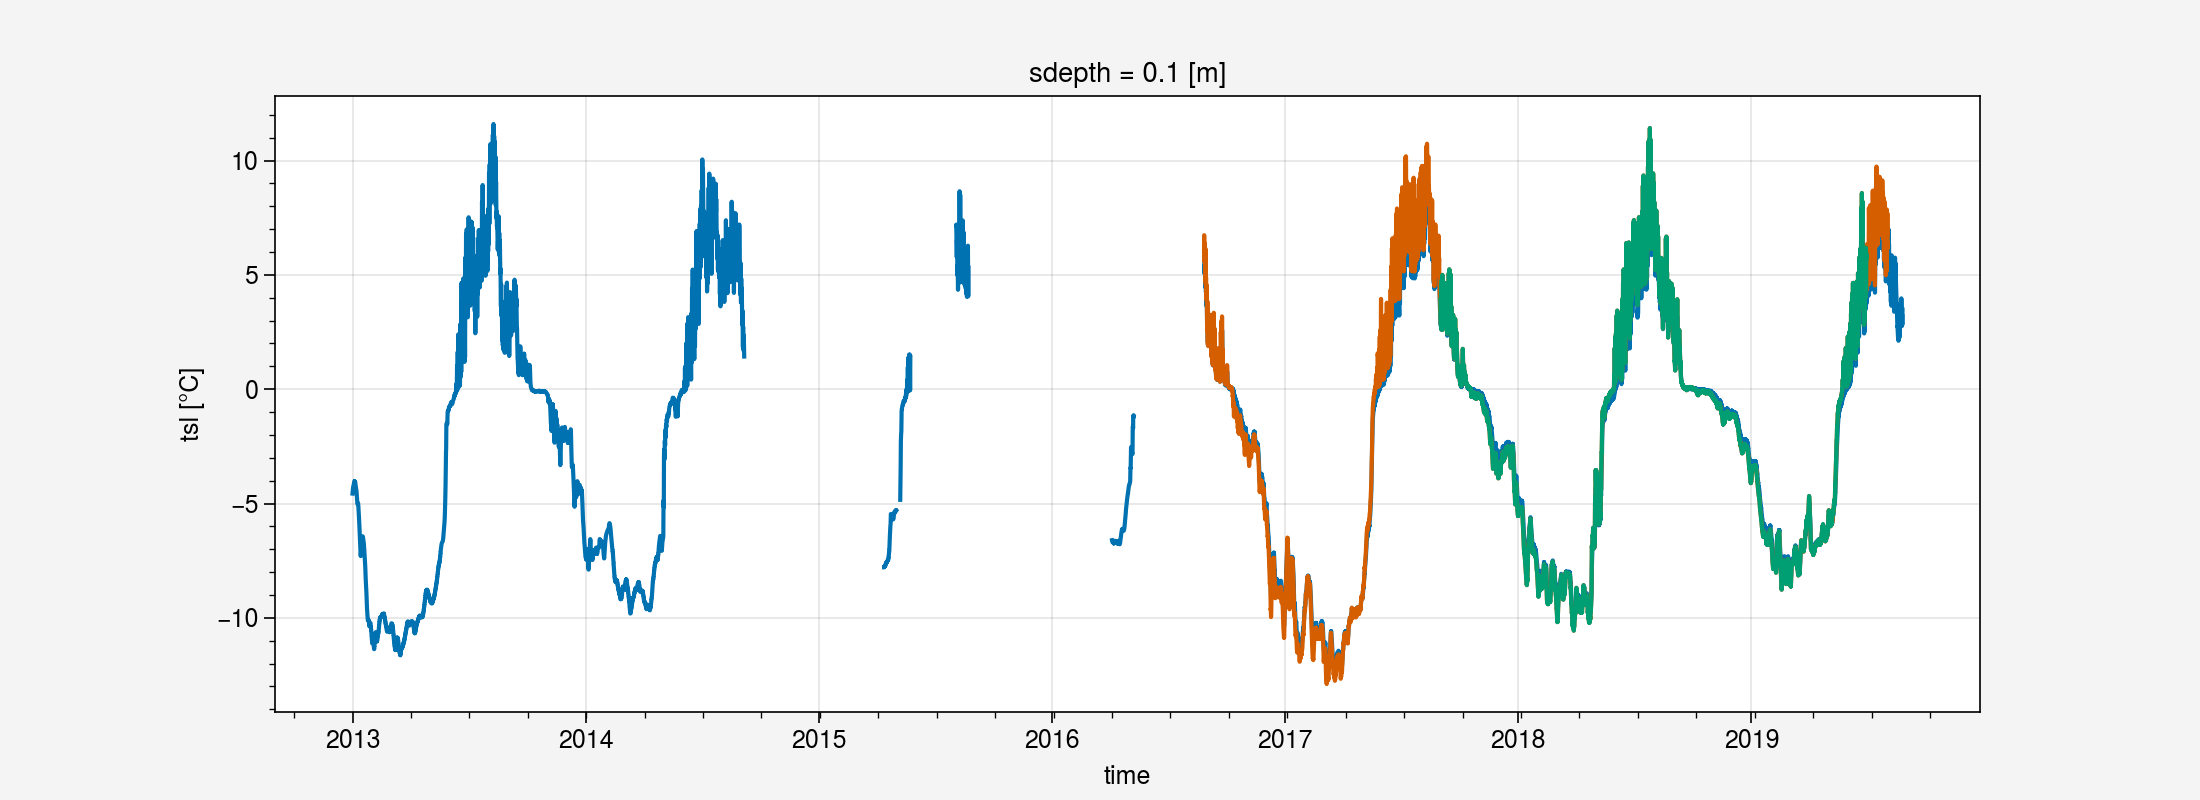

In [194]:
%matplotlib inline
ds_TVC_CLASSIC_2013_2020.SoilT_20cm.plot(figsize=(11,4))
# ds_TVC_CLASSIC_2013_2020.SoilTprofile_20cm.plot()
# ds_eval.tsl.sel(sdepth=0.20).plot()
ds_TVC_CLASSIC_2013_2020.SoilTprofile_10cm.plot()
ds_eval.tsl.sel(sdepth=0.10).plot()
# ds_TVC_CLASSIC_2013_2020.SoilTprofile_5cm.plot()

In [195]:
ds_TVC_CLASSIC_2013_2020

<xarray.Dataset> Size: 33MB
Dimensions:            (time: 123607)
Coordinates:
  * time               (time) datetime64[ns] 989kB 2013-01-01 ... 2020-01-20T...
Data variables: (12/32)
    SWin               (time) float64 989kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SWout              (time) float64 989kB 0.0 0.014 0.0 ... 0.316 0.084 0.057
    LWin               (time) float64 989kB 238.0 237.7 236.7 ... 228.9 227.0
    LWout              (time) float64 989kB 238.3 237.9 237.2 ... 232.3 231.9
    albedo             (time) float64 989kB 0.755 nan nan 0.643 ... nan nan nan
    AirT               (time) float64 989kB -18.8 -19.07 -19.2 ... -26.65 -27.1
    ...                 ...
    H_filt             (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    NEE_filled         (time) float64 989kB nan nan nan ... 0.05 0.4015 0.3455
    LE_filled          (time) float64 989kB nan nan nan ... 0.8241 -0.1844
    H_filled           (time) float64 989kB nan nan nan ... -2.274 -2.865 -4.064
    CH4_filt           (time) float64 989kB nan nan nan nan ... nan nan nan nan
    CH4_filled         (time) float64 989kB nan nan nan nan ... nan nan nan nan

In [206]:
variable_names = list(ds_TVC_CLASSIC_2013_2020.data_vars.keys())[22:]
variable_names.insert(0, 'albedo')
variable_names

['albedo',
 'SoilHEatFlux_org',
 'SoilHEatFlux_min',
 'NEE_filt',
 'LE_filt',
 'H_filt',
 'NEE_filled',
 'LE_filled',
 'H_filled',
 'CH4_filt',
 'CH4_filled']

In [208]:
for var in variable_names:
    ds_eval[var] = ds_TVC_CLASSIC_2013_2020[var].sel(time=ds_eval.time)
ds_eval['albedo'].attrs = {'units': '-'}
ds_eval

<xarray.Dataset> Size: 3MB
Dimensions:           (time: 16009, sdepth: 4)
Coordinates:
  * time              (time) datetime64[ns] 128kB 2017-09-01 ... 2019-06-30
  * sdepth            (sdepth) float64 32B 0.02 0.05 0.1 0.2
Data variables: (12/14)
    snd_auto          (time) float64 128kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tsl               (sdepth, time) float64 512kB 2.119 2.146 ... 4.727 4.72
    swc               (sdepth, time) float64 512kB 0.238 0.231 ... 0.432 0.433
    SoilHEatFlux_org  (time) float64 128kB -19.83 -12.77 -16.45 ... nan nan nan
    SoilHEatFlux_min  (time) float64 128kB -3.615 0.228 -2.691 ... nan nan nan
    NEE_filt          (time) float64 128kB nan nan nan ... -0.5804 -0.0614
    ...                ...
    NEE_filled        (time) float64 128kB 1.367 1.6 1.44 ... -0.5804 -0.0614
    LE_filled         (time) float64 128kB 2.371 2.484 3.322 ... 5.72 -1.015
    H_filled          (time) float64 128kB -16.61 -21.56 -21.99 ... -6.48 -12.94
    CH4_filt          (time) float64 128kB nan nan nan nan ... nan nan nan nan
    CH4_filled        (time) float64 128kB 0.0008643 0.001264 ... 0.0002559
    albedo            (time) float64 128kB nan nan nan nan ... 0.428 0.381 0.331
Attributes:
    location:    Trail Valley Creak
    ref:         https://doi.org/10.5194/tc-16-4201-2022
    soil_ref:    https://doi.pangaea.de/10.1594/PANGAEA.962726
    downloaded:  13/10/2024 by Mickaël Lalande
    merge:       TVCSnowCLM/TVCMetData/MSC_Snowdepth.csv and TVC_CLASSIC_2013...

In [212]:
path

'/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData'

In [211]:
ds_eval.to_netcdf(path+'/obs_insitu_tvc_2017_2019.nc')